#Data load

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.3/269.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 5.6 MB/s eta 0:00:00


In [ ]:
!pip install datasets transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm.notebook import tqdm

from datasets import load_dataset
import random
from sklearn import metrics, model_selection, preprocessing
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

import transformers
from transformers import AdamW, get_linear_schedule_with_warmup

from datasets import load_dataset

import re
import nltk

In [ ]:

dataset_train = load_dataset("go_emotions", "simplified", split="train")
dataset_val = load_dataset("go_emotions", "simplified", split="validation")
dataset_test = load_dataset("go_emotions", "simplified", split="test")

Generating train split:   0%|          | 0/43410 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5426 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5427 [00:00<?, ? examples/s]

Dataset go_emotions downloaded and prepared to /root/.cache/huggingface/datasets/go_emotions/simplified/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d. Subsequent calls will reuse this data.


#Experiment2: Train/validate/test datasets spitting for Ramdom forest(number of estimators:500)


1.   Model1: Original splitting
2.   Model2: train/val: 0.2, test: fixed
3.   Model3: val/test: 0.2,  train: fixed


In [ ]:
from datasets import concatenate_datasets, Dataset
from sklearn.model_selection import train_test_split

dataset = concatenate_datasets([dataset_train, dataset_val])

dataset_train, dataset_val = train_test_split(dataset, test_size=0.2, random_state=42)

In [ ]:
from datasets import concatenate_datasets, Dataset
from sklearn.model_selection import train_test_split

dataset = concatenate_datasets([dataset_val, dataset_test])

dataset_val, dataset_test = train_test_split(dataset, test_size=0.8, random_state=42)

In [ ]:
from datasets import concatenate_datasets, Dataset
from sklearn.model_selection import train_test_split

dataset = concatenate_datasets([dataset_train, dataset_test])

dataset_train, dataset_test = train_test_split(dataset, test_size=0.2, random_state=42)

#Adjective word cloud

In [ ]:
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
tagged_words = nltk.pos_tag(nltk.word_tokenize(' '.join(data_df['text'].tolist())))

adjectives = [word[0].lower() for word in tagged_words if word[1] in ['JJ', 'JJR', 'JJS']]

#Statistical word frequency
adjective_counts = Counter(adjectives)
top_adjectives = adjective_counts.most_common(50)

sns.set_style('whitegrid')
sns.set_palette('husl')
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=[x[0] for x in top_adjectives], y=[x[1] for x in top_adjectives], ax=ax)
ax.set_title('Top 50 Adjectives in Text')
ax.set_xlabel('Adjective')
ax.set_ylabel('Frequency')
ax.set_xticklabels(labels=[x[0].title() for x in top_adjectives], rotation=90)
plt.show()

In [ ]:
from collections import Counter
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
# Word formation reduction of words in text
lemmatizer = WordNetLemmatizer()
text_lemmatized = [lemmatizer.lemmatize(word.lower(), pos='v') for word in word_tokenize(val_df['text'].str.cat(sep=' ')) if word.isalpha() and word.lower() not in stop_words]

verb_counts = Counter([word for word in text_lemmatized if nltk.pos_tag([word])[0][1] in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']])
verb_counts = dict(sorted(verb_counts.items(), key=lambda item: item[1], reverse=True))

wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(verb_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [ ]:

adjective_counts = Counter([word for word in text_lemmatized if nltk.pos_tag([word])[0][1] in ['JJ', 'JJR', 'JJS']])
adjective_counts = dict(sorted(adjective_counts.items(), key=lambda item: item[1], reverse=True))

wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(adjective_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
noun_counts = Counter([word for word in text_lemmatized if nltk.pos_tag([word])[0][1] in ['NN', 'NNS', 'NNP', 'NNPS']])
noun_counts = dict(sorted(noun_counts.items(), key=lambda item: item[1], reverse=True))

wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(noun_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# data_df['text'] = data_df['text'].apply(lambda x: len(x))
# text_len_counts = data_df['text'].value_counts().sort_index()
# plt.figure(figsize=(10, 6))
# plt.bar(text_len_counts.index, text_len_counts.values)
# plt.xlabel('Text Length')
# plt.ylabel('Counts')
# plt.title('Train Set: Text Length Distribution')
# plt.show()

# val_df['text'] = val_df['text'].apply(lambda x: len(x))
# text_len_counts = val_df['text'].value_counts().sort_index()
# plt.figure(figsize=(10, 6))
# plt.bar(text_len_counts.index, text_len_counts.values)
# plt.xlabel('Text Length')
# plt.ylabel('Counts')
# plt.title('Val Set: Text Length Distribution')
# plt.show()

test_df['text'] = test_df['text'].apply(lambda x: len(x))
text_len_counts = test_df['text'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(text_len_counts.index, text_len_counts.values)
plt.xlabel('Text Length')
plt.ylabel('Counts')
plt.title('Test Set: Text Length Distribution')
plt.show()

#Label Merge

In [ ]:

data_df = pd.DataFrame(dataset_train)
print(data_df.shape)
cols = data_df.columns
print(cols)





(39069, 3)
Index(['text', 'labels', 'id'], dtype='object')


In [ ]:

print(data_df[50:100])

                                                 text    labels       id
50  So would you want [NAME] first round, [NAME] s...      [27]  ef20j9s
51  Y'all ever try to ride a scooter with one hand...       [7]  eerg5j0
52  I’m broke, dealing with my own mental illness,...  [16, 25]  eeadl6b
53  Ok bud. I guess I havent been living my entire...      [20]  edirbj0
54      Stay strong. You are better off without them.       [0]  edhdxb4
55                Hi! :) Because I am broke, I guess.      [25]  edppag5
56  As fun as that sounds, please just call the po...       [1]  ee45t1m
57                        No one comes here it’s cool      [23]  efb0qog
58  I gathered that part from the Boulder Barnes a...       [7]  ee2yxd5
59  my mom caught be masturbating to dominatrix po...       [1]  eev5l0o
60  IIRC Tool doesn’t like their stuff on Spotify ...      [27]  eeofee6
61  He was replying to boiledchickenleg down below...      [27]  ef8s27p
62                                       Ha congrat

Count the data volume of each label in the original data set

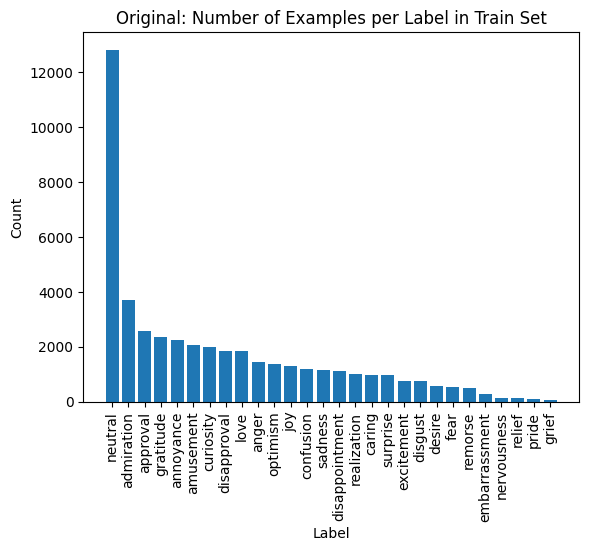

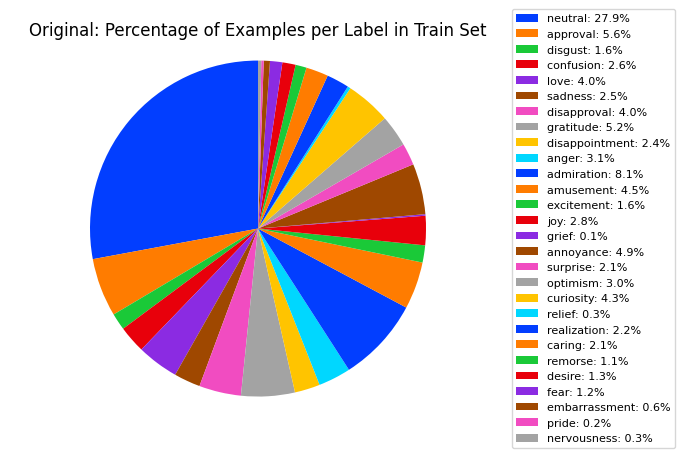

In [ ]:
import seaborn as sns
label_dict = {
    0: 'admiration',
    1: 'amusement',
    2: 'anger',
    3: 'annoyance',
    4: 'approval',
    5: 'caring',
    6: 'confusion',
    7: 'curiosity',
    8: 'desire',
    9: 'disappointment',
    10: 'disapproval',
    11: 'disgust',
    12: 'embarrassment',
    13: 'excitement',
    14: 'fear',
    15: 'gratitude',
    16: 'grief',
    17: 'joy',
    18: 'love',
    19: 'nervousness',
    20: 'optimism',
    21: 'pride',
    22: 'realization',
    23: 'relief',
    24: 'remorse',
    25: 'sadness',
    26: 'surprise',
    27: 'neutral',
}

label_counts = {}
for example in data_df.itertuples():
    for label in example.labels:
        label_name = label_dict[label]
        label_counts[label_name] = label_counts.get(label_name, 0) + 1

# Convert labels and corresponding quantities into numpy arrays
labels = list(label_counts.keys())
counts = list(label_counts.values())
labels_array = np.array(labels)
counts_array = np.array(counts)

sorted_indices = np.argsort(-counts_array)
sorted_labels = labels_array[sorted_indices]
sorted_counts = counts_array[sorted_indices]

plt.bar(sorted_labels, sorted_counts)
plt.xticks(rotation=90)
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Original: Number of Examples per Label in Train Set")
plt.show()



# calculate percentage
percentages = [f"{label}: {count / sum(counts) * 100:.1f}%" for label, count in zip(labels, counts)]


palette = sns.color_palette("bright", len(labels))
colors = {label: palette[i] for i, label in enumerate(labels)}


fig, ax = plt.subplots()
wedges, texts = ax.pie(counts, colors=[colors[label] for label in labels], startangle=90)
ax.axis('equal')


for text in texts:
    text.set_size(8)

plt.legend(percentages, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=8)

plt.title("Original: Percentage of Examples per Label in Train Set")
plt.show()




In [ ]:
split_data = []

for index, row in data_df.iterrows():
    id = row['id']
    text = row['text']
    labels = row['labels']

    # Iterate over all tags in the current line
    for label in labels:
        #
        split_data.append({'text': text, 'labels': label, 'id': id})

# Reset train_df to new DataFrame
data_df = pd.DataFrame(split_data)

print(data_df[50:100])

                                                 text  labels       id
50  My inevitable famine is when I run out of pop ...      25  edt2a5d
51                                    Notice me dooku      27  ef0wyud
52  So would you want [NAME] first round, [NAME] s...      27  ef20j9s
53  Y'all ever try to ride a scooter with one hand...       7  eerg5j0
54  I’m broke, dealing with my own mental illness,...      16  eeadl6b
55  I’m broke, dealing with my own mental illness,...      25  eeadl6b
56  Ok bud. I guess I havent been living my entire...      20  edirbj0
57      Stay strong. You are better off without them.       0  edhdxb4
58                Hi! :) Because I am broke, I guess.      25  edppag5
59  As fun as that sounds, please just call the po...       1  ee45t1m
60                        No one comes here it’s cool      23  efb0qog
61  I gathered that part from the Boulder Barnes a...       7  ee2yxd5
62  my mom caught be masturbating to dominatrix po...       1  eev5l0o
63  II

Train dataset emotion merge

0-admiration	1-amusement 	2-anger 	3-annoyanc	4-approval 	5-caring 	6-confusion 	7-curiosity 	8-desire 	9-disappointment 	10-disapproval 	11-disgust 	12-embarrassment 	13-excitement 	14-fear 	15-gratitude 	16-grief 	17-joy 	18-love 	19-nervousness 	20-optimism 	21-pride 	22-realization 	23-relief 	24-remorse 	25-sadness 	26-surprise 	27-neutral

In [ ]:


label_mapping = {
    2: [2, 3, 10],
    11: [11],
    14: [14, 19],
    17: [17, 1, 13, 23, 4],
    18: [15, 5, 0],
    21: [21],
    25: [25, 9, 12, 16, 24],
    26: [26, 22],
    20: [20],
    6: [6],
    12: [12],
    8: [8],
    7: [7],
    27: [27]
}






reverse_mapping = {label: key for key, values in label_mapping.items() for label in values}


data_df['labels'] = data_df['labels'].replace(reverse_mapping)






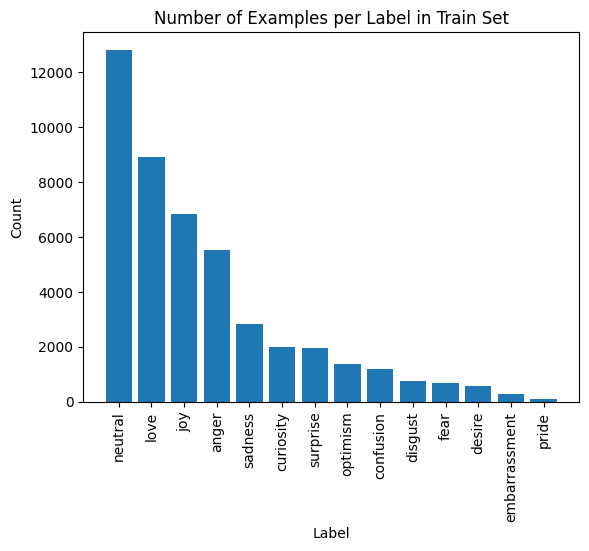

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


label_counts = {}
for example in data_df.itertuples():
    labels = example.labels
    if isinstance(labels, int):
        labels = [labels]
    labels_mapped = list(map(lambda x: label_dict[x], labels))
    for label in labels_mapped:
        label_counts[label] = label_counts.get(label, 0) + 1


labels = list(label_counts.keys())
counts = list(label_counts.values())
labels_array = np.array(labels)
counts_array = np.array(counts)


sorted_indices = np.argsort(-counts_array)
sorted_labels = labels_array[sorted_indices]
sorted_counts = counts_array[sorted_indices]


plt.bar(sorted_labels, sorted_counts)
plt.xticks(rotation=90)
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Number of Examples per Label in Train Set")
plt.show()

In [ ]:
print(data_df[50:100])

                                                 text  labels       id
50  My inevitable famine is when I run out of pop ...      25  edt2a5d
51                                    Notice me dooku      27  ef0wyud
52  So would you want [NAME] first round, [NAME] s...      27  ef20j9s
53  Y'all ever try to ride a scooter with one hand...       7  eerg5j0
54  I’m broke, dealing with my own mental illness,...      25  eeadl6b
55  I’m broke, dealing with my own mental illness,...      25  eeadl6b
56  Ok bud. I guess I havent been living my entire...      20  edirbj0
57      Stay strong. You are better off without them.      18  edhdxb4
58                Hi! :) Because I am broke, I guess.      25  edppag5
59  As fun as that sounds, please just call the po...      17  ee45t1m
60                        No one comes here it’s cool      17  efb0qog
61  I gathered that part from the Boulder Barnes a...       7  ee2yxd5
62  my mom caught be masturbating to dominatrix po...      17  eev5l0o
63  II

**Validate dataset merge**

In [ ]:
val_df = pd.DataFrame(dataset_val)

print(val_df.shape)
cols = val_df.columns
print(cols)

val_df.head()

(5426, 3)
Index(['text', 'labels', 'id'], dtype='object')


,text,labels,id
0,Is this in New Orleans?? I really feel like th...,[27],edgurhb
1,"You know the answer man, you are programmed to...","[4, 27]",ee84bjg
2,I've never been this sad in my life!,[25],edcu99z
3,The economy is heavily controlled and subsidiz...,"[4, 27]",edc32e2
4,He could have easily taken a real camera from ...,[20],eepig6r


In [ ]:
split_data = []


for index, row in val_df.iterrows():
    id = row['id']
    text = row['text']
    labels = row['labels']

    for label in labels:

        split_data.append({'text': text, 'labels': label, 'id': id})



val_df = pd.DataFrame(split_data)

print(val_df)

                                                   text  labels       id
0     Is this in New Orleans?? I really feel like th...      27  edgurhb
1     You know the answer man, you are programmed to...       4  ee84bjg
2     You know the answer man, you are programmed to...      27  ee84bjg
3                  I've never been this sad in my life!      25  edcu99z
4     The economy is heavily controlled and subsidiz...       4  edc32e2
...                                                 ...     ...      ...
6375  It's pretty dangerous when the state decides w...      14  edyrazk
6376  I filed for divorce this morning. Hoping he mo...      20  edi2z3y
6377  The last time it happened I just said, "No" an...      10  eewbqtx
6378  I can’t stand this arrogant prick he’s no bett...       3  eefx57m
6379              ::but I like baby bangs:: /tiny voice      18  ed5h3jh

[6380 rows x 3 columns]


In [ ]:
label_mapping = {
    2: [2, 3, 10],
    11: [11],
    14: [14, 19],
    17: [17, 1, 13, 23, 4],
    18: [15, 5, 0],
    21: [21],
    25: [25, 9, 12, 16, 24],
    26: [26, 22],
    20: [20],
    6: [6],
    12: [12],
    8: [8],
    7: [7],
    27: [27]
}

reverse_mapping = {label: key for key, values in label_mapping.items() for label in values}
val_df['labels'] = val_df['labels'].replace(reverse_mapping)

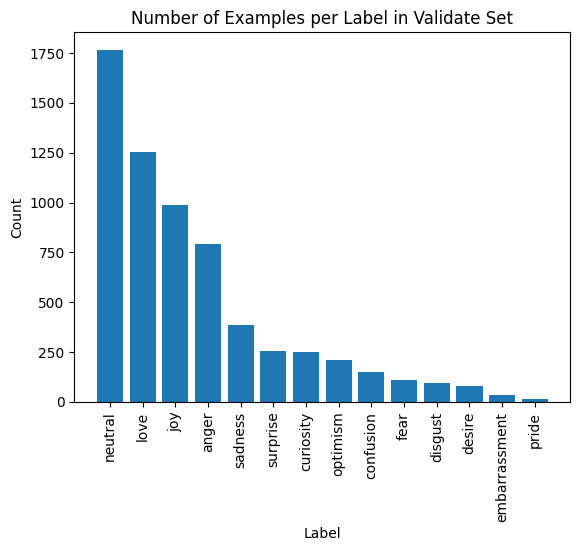

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


label_counts = {}
for example in val_df.itertuples():
    labels = example.labels
    if isinstance(labels, int):
        labels = [labels]
    labels_mapped = list(map(lambda x: label_dict[x], labels))
    for label in labels_mapped:
        label_counts[label] = label_counts.get(label, 0) + 1


labels = list(label_counts.keys())
counts = list(label_counts.values())
labels_array = np.array(labels)
counts_array = np.array(counts)


sorted_indices = np.argsort(-counts_array)
sorted_labels = labels_array[sorted_indices]
sorted_counts = counts_array[sorted_indices]

plt.bar(sorted_labels, sorted_counts)
plt.xticks(rotation=90)
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Number of Examples per Label in Validate Set")
plt.show()

In [ ]:
print(val_df)

                                                   text  labels       id
0     Is this in New Orleans?? I really feel like th...      27  edgurhb
1     You know the answer man, you are programmed to...      17  ee84bjg
2     You know the answer man, you are programmed to...      27  ee84bjg
3                  I've never been this sad in my life!      25  edcu99z
4     The economy is heavily controlled and subsidiz...      17  edc32e2
...                                                 ...     ...      ...
6375  It's pretty dangerous when the state decides w...      14  edyrazk
6376  I filed for divorce this morning. Hoping he mo...      20  edi2z3y
6377  The last time it happened I just said, "No" an...       2  eewbqtx
6378  I can’t stand this arrogant prick he’s no bett...       2  eefx57m
6379              ::but I like baby bangs:: /tiny voice      18  ed5h3jh

[6380 rows x 3 columns]


**Test dataset merge**

In [ ]:
test_df = pd.DataFrame(dataset_test)
print(test_df.shape)
cols = test_df.columns
print(cols)

test_df.head()

(9768, 3)
Index(['text', 'labels', 'id'], dtype='object')


,text,labels,id
0,They look the same way fighting as I do dancing,[27],eda15et
1,Interesting I wasn't aware of this. Maybe prov...,"[7, 26]",edy01s0
2,"I put ""haha"" after everything I say because I'...","[9, 25]",eeujnpb
3,Sure dude. Although I’d say my rate at dispens...,"[1, 20, 27]",ef7ekkf
4,Go to the movies with people not related to me.,[27],eddd68m


In [ ]:
split_data = []


for index, row in test_df.iterrows():
    id = row['id']
    text = row['text']
    labels = row['labels']

    for label in labels:

        split_data.append({'text': text, 'labels': label, 'id': id})



test_df = pd.DataFrame(split_data)


print(test_df)

                                                    text  labels       id
0        They look the same way fighting as I do dancing      27  eda15et
1      Interesting I wasn't aware of this. Maybe prov...       7  edy01s0
2      Interesting I wasn't aware of this. Maybe prov...      26  edy01s0
3      I put "haha" after everything I say because I'...       9  eeujnpb
4      I put "haha" after everything I say because I'...      25  eeujnpb
...                                                  ...     ...      ...
11540  That’s her way of saying you aren’t getting th...      27  eeqkifk
11541  I cant wait until /r/fuckthealtright is labele...      27  efd8f1s
11542                                        Miss you...      25  edwfc6l
11543  Oops. I assumed, wrongly, that it was the same...      12  ef9prja
11544  He’s your rebound guy. Have fun. But expect li...      27  efezekn

[11545 rows x 3 columns]


In [ ]:

reverse_mapping = {label: key for key, values in label_mapping.items() for label in values}


test_df['labels'] = test_df['labels'].replace(reverse_mapping)

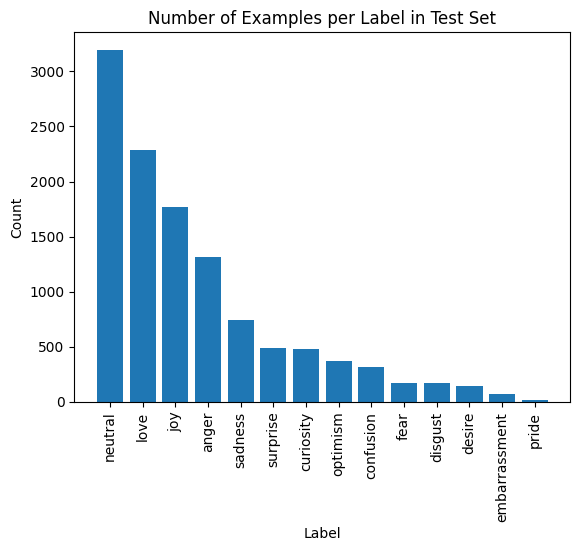

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


label_counts = {}
for example in test_df.itertuples():
    labels = example.labels
    if isinstance(labels, int):
        labels = [labels]
    labels_mapped = list(map(lambda x: label_dict[x], labels))
    for label in labels_mapped:
        label_counts[label] = label_counts.get(label, 0) + 1


labels = list(label_counts.keys())
counts = list(label_counts.values())
labels_array = np.array(labels)
counts_array = np.array(counts)


sorted_indices = np.argsort(-counts_array)
sorted_labels = labels_array[sorted_indices]
sorted_counts = counts_array[sorted_indices]


plt.bar(sorted_labels, sorted_counts)
plt.xticks(rotation=90)
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Number of Examples per Label in Test Set")
plt.show()

In [ ]:
print(test_df)

                                                    text  labels       id
0        They look the same way fighting as I do dancing      27  eda15et
1      Interesting I wasn't aware of this. Maybe prov...       7  edy01s0
2      Interesting I wasn't aware of this. Maybe prov...      26  edy01s0
3      I put "haha" after everything I say because I'...      25  eeujnpb
4      I put "haha" after everything I say because I'...      25  eeujnpb
...                                                  ...     ...      ...
11540  That’s her way of saying you aren’t getting th...      27  eeqkifk
11541  I cant wait until /r/fuckthealtright is labele...      27  efd8f1s
11542                                        Miss you...      25  edwfc6l
11543  Oops. I assumed, wrongly, that it was the same...      12  ef9prja
11544  He’s your rebound guy. Have fun. But expect li...      27  efezekn

[11545 rows x 3 columns]


In [ ]:
#remove duplicate text
data_df.drop_duplicates(subset=["text"], inplace=True)
val_df.drop_duplicates(subset=["text"], inplace=True)
test_df.drop_duplicates(subset=["text"], inplace=True)
print(data_df.shape)
print(val_df.shape)
print(test_df.shape)

# print(data_df.head())
# print(val_df.head())

print(data_df[50:100])

(38927, 3)
(5423, 3)
(9751, 3)
                                                  text  labels       id
52   So would you want [NAME] first round, [NAME] s...      27  ef20j9s
53   Y'all ever try to ride a scooter with one hand...       7  eerg5j0
54   I’m broke, dealing with my own mental illness,...      25  eeadl6b
56   Ok bud. I guess I havent been living my entire...      20  edirbj0
57       Stay strong. You are better off without them.      18  edhdxb4
58                 Hi! :) Because I am broke, I guess.      25  edppag5
59   As fun as that sounds, please just call the po...      17  ee45t1m
60                         No one comes here it’s cool      17  efb0qog
61   I gathered that part from the Boulder Barnes a...       7  ee2yxd5
62   my mom caught be masturbating to dominatrix po...      17  eev5l0o
63   IIRC Tool doesn’t like their stuff on Spotify ...      27  eeofee6
64   He was replying to boiledchickenleg down below...      27  ef8s27p
65                               

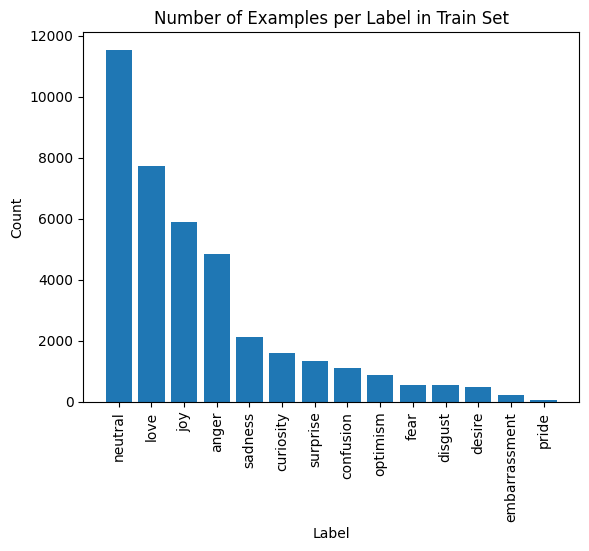

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


label_counts = {}
for example in data_df.itertuples():
    labels = example.labels
    if isinstance(labels, int):
        labels = [labels]
    labels_mapped = list(map(lambda x: label_dict[x], labels))
    for label in labels_mapped:
        label_counts[label] = label_counts.get(label, 0) + 1


labels = list(label_counts.keys())
counts = list(label_counts.values())
labels_array = np.array(labels)
counts_array = np.array(counts)


sorted_indices = np.argsort(-counts_array)
sorted_labels = labels_array[sorted_indices]
sorted_counts = counts_array[sorted_indices]


plt.bar(sorted_labels, sorted_counts)
plt.xticks(rotation=90)
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Number of Examples per Label in Train Set")
plt.show()

#Data pre-processing

In [ ]:
!pip install contractions


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 11.3 MB/s eta 0:00:00


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import contractions

# Extended Abbreviations
def expand_contractions(text):
    return contractions.fix(text)

# data_df["text"]apply
data_df["text"] = data_df["text"].apply(lambda x: expand_contractions(str(x)))
val_df["text"] = val_df["text"].apply(lambda x: expand_contractions(str(x)))

print(data_df.head())
print(val_df.head())

                                                text  labels       id
0                          Do not get excited yet...      27  ee6ssa1
1  This is the technically correct answer, but it...      17  edtegwp
2   You will win in the long run by not shutting up.      17  ee2tl38
3  That is even worse. No tax from them and we pr...      11  eefugwr
4  Imagine wanting a crock-pot that cooks enough ...       6  eeoyii3
                                                text  labels       id
0  Is this in New Orleans?? I really feel like th...      27  edgurhb
1  You know the answer man, you are programmed to...      17  ee84bjg
3             I have never been this sad in my life!      25  edcu99z
4  The economy is heavily controlled and subsidiz...      17  edc32e2
6  He could have easily taken a real camera from ...      20  eepig6r


In [ ]:
data_df["text"] = data_df["text"].apply(lambda x: re.sub(r"[^a-zA-Z\s]", "", x))
val_df["text"] = val_df["text"].apply(lambda x: re.sub(r"[^a-zA-Z\s]", "", x))

print(data_df.head())
print(val_df.head())

                                                text  labels       id
0                             Do not get excited yet      27  ee6ssa1
1  This is the technically correct answer but it ...      17  edtegwp
2    You will win in the long run by not shutting up      17  ee2tl38
3  That is even worse No tax from them and we pro...      11  eefugwr
4  Imagine wanting a crockpot that cooks enough f...       6  eeoyii3
                                                text  labels       id
0  Is this in New Orleans I really feel like this...      27  edgurhb
1  You know the answer man you are programmed to ...      17  ee84bjg
3              I have never been this sad in my life      25  edcu99z
4  The economy is heavily controlled and subsidiz...      17  edc32e2
6  He could have easily taken a real camera from ...      20  eepig6r


In [ ]:
data_df["text"] = data_df["text"].apply(lambda x: x.lower())
val_df["text"] = val_df["text"].apply(lambda x: x.lower())

print(data_df.head())
print(val_df.head())

                                                text  labels       id
0                             do not get excited yet      27  ee6ssa1
1  this is the technically correct answer but it ...      17  edtegwp
2    you will win in the long run by not shutting up      17  ee2tl38
3  that is even worse no tax from them and we pro...      11  eefugwr
4  imagine wanting a crockpot that cooks enough f...       6  eeoyii3
                                                text  labels       id
0  is this in new orleans i really feel like this...      27  edgurhb
1  you know the answer man you are programmed to ...      17  ee84bjg
3              i have never been this sad in my life      25  edcu99z
4  the economy is heavily controlled and subsidiz...      17  edc32e2
6  he could have easily taken a real camera from ...      20  eepig6r


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()

# Word Form Reduction
data_df['text'] = data_df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word.lower(), pos='v') for word in word_tokenize(x) if word.isalpha()]))
val_df['text'] = val_df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word.lower(), pos='v') for word in word_tokenize(x) if word.isalpha()]))
print(data_df.head())
print(val_df.head())


                                                text  labels       id
0                              do not get excite yet      27  ee6ssa1
1  this be the technically correct answer but it ...      17  edtegwp
2        you will win in the long run by not shut up      17  ee2tl38
3  that be even worse no tax from them and we pro...      11  eefugwr
4  imagine want a crockpot that cook enough for o...       6  eeoyii3
                                                text  labels       id
0  be this in new orleans i really feel like this...      27  edgurhb
1  you know the answer man you be program to capt...      17  ee84bjg
3                i have never be this sad in my life      25  edcu99z
4  the economy be heavily control and subsidize b...      17  edc32e2
6  he could have easily take a real camera from a...      20  eepig6r


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

data_df["text"] = data_df["text"].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))
val_df["text"] = val_df["text"].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))

print(data_df.head())
print(val_df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  labels       id
0                                     get excite yet      27  ee6ssa1
1  technically correct answer still suck consider...      17  edtegwp
2                                  win long run shut      17  ee2tl38
3                     even worse tax provide service      11  eefugwr
4  imagine want crockpot cook enough one person p...       6  eeoyii3
                                                text  labels       id
0           new orleans really feel like new orleans      27  edgurhb
1     know answer man program capture cod send avoid      17  ee84bjg
3                                     never sad life      25  edcu99z
4  economy heavily control subsidize government c...      17  edc32e2
6  could easily take real camera legitimate sourc...      20  eepig6r


In [ ]:
print(data_df[50:100])

                                                  text  labels       id
52   would want name first round name second guy third      27  ef20j9s
53       ever try ride scooter one hand shit dangerous       7  eerg5j0
54   break deal mental illness immediately concern ...      25  eeadl6b
56           ok bud guess live entire life asthma idea      20  edirbj0
57                          stay strong better without      18  edhdxb4
58                                      hi break guess      25  edppag5
59                        fun sound please call police      17  ee45t1m
60                                       one come cool      17  efb0qog
61   gather part boulder barnes noble part curious ...       7  ee2yxd5
62   mom catch masturbate dominatrix porn bore vani...      17  eev5l0o
63   iirc tool like stuff spotify like business pra...      27  eeofee6
64                         reply boiledchickenleg look      27  ef8s27p
65                                         ha congrats      27  

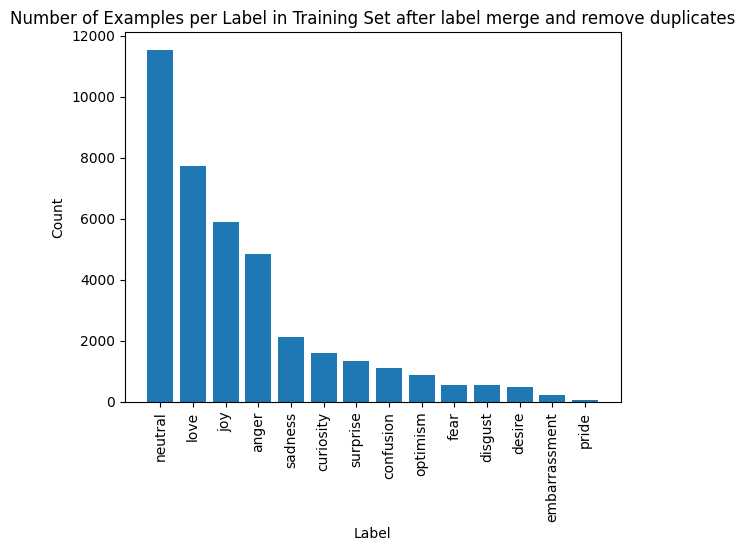

In [ ]:
#Count the number of occurrences of each label
label_counts = {}
for example in data_df.itertuples():
    labels = example.labels
    if isinstance(labels, int):
        labels = [labels]
    labels_mapped = list(map(lambda x: label_dict[x], labels))
    for label in labels_mapped:
        label_counts[label] = label_counts.get(label, 0) + 1

labels = list(label_counts.keys())
counts = list(label_counts.values())
labels_array = np.array(labels)
counts_array = np.array(counts)

# high->low
sorted_indices = np.argsort(-counts_array)
sorted_labels = labels_array[sorted_indices]
sorted_counts = counts_array[sorted_indices]

plt.bar(sorted_labels, sorted_counts)
plt.xticks(rotation=90)
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Number of Examples per Label in Training Set after label merge and remove duplicates")
plt.show()

#Experiment1: Hyperparameters optimisation for Ramdom forest vs. number of estimators

1.   Model1: n_estimators=250
2.   Model2: n_estimators=350
3.   Model2: n_estimators=500


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer object, vectorize data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(data_df["text"])
X_val = vectorizer.transform(val_df["text"])
X_test = vectorizer.transform(test_df["text"])
y_train = data_df["labels"]
y_val = val_df["labels"]
y_test = test_df["labels"]


print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

X_train shape: (38927, 21296)
X_val shape: (5423, 21296)
X_test shape: (9751, 21296)


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


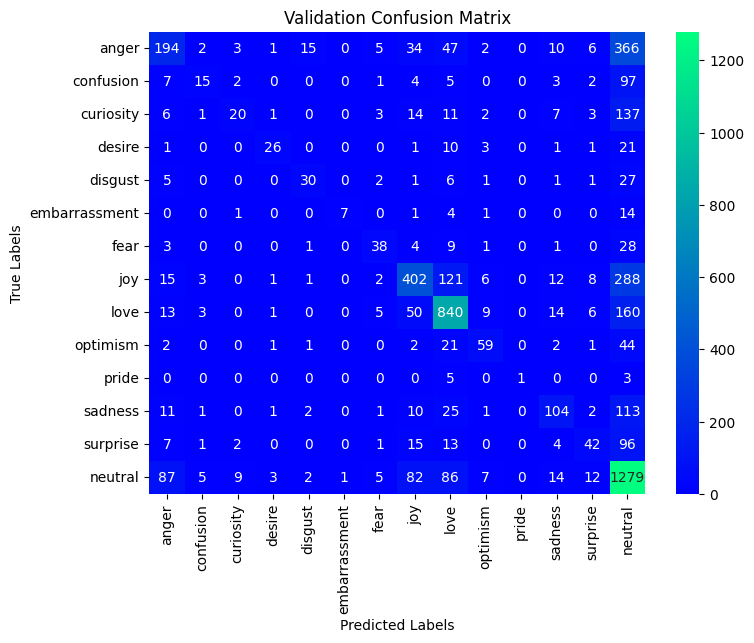

Validation Classification Report:
                precision    recall  f1-score   support

        anger      0.553     0.283     0.375       685
    confusion      0.484     0.110     0.180       136
    curiosity      0.541     0.098     0.165       205
       desire      0.743     0.406     0.525        64
      disgust      0.577     0.405     0.476        74
embarrassment      0.875     0.250     0.389        28
         fear      0.603     0.447     0.514        85
          joy      0.648     0.468     0.544       859
         love      0.698     0.763     0.729      1101
     optimism      0.641     0.444     0.524       133
        pride      1.000     0.111     0.200         9
      sadness      0.601     0.384     0.468       271
     surprise      0.500     0.232     0.317       181
      neutral      0.478     0.803     0.600      1592

     accuracy                          0.564      5423
    macro avg      0.639     0.372     0.429      5423
 weighted avg      0.582    

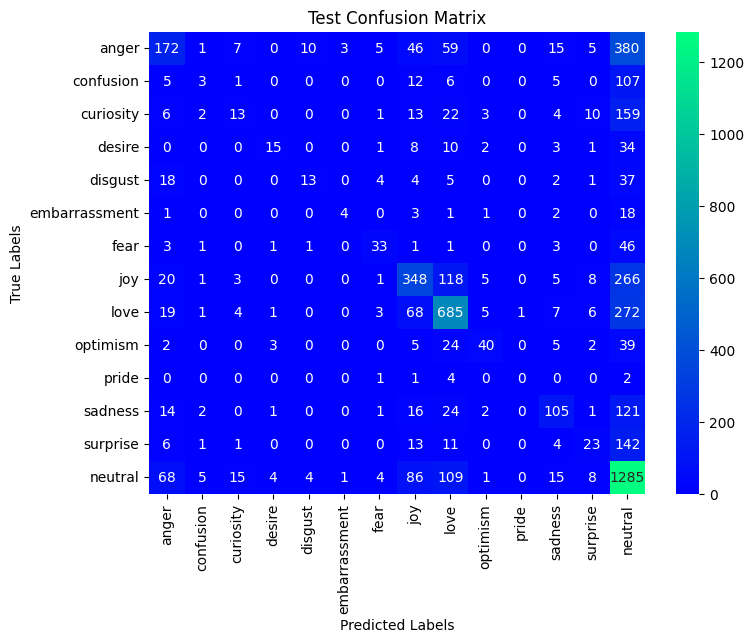

Test Classification Report:
                precision    recall  f1-score   support

        anger      0.515     0.245     0.332       703
    confusion      0.176     0.022     0.038       139
    curiosity      0.295     0.056     0.094       233
       desire      0.600     0.203     0.303        74
      disgust      0.464     0.155     0.232        84
embarrassment      0.500     0.133     0.211        30
         fear      0.611     0.367     0.458        90
          joy      0.558     0.449     0.497       775
         love      0.635     0.639     0.637      1072
     optimism      0.678     0.333     0.447       120
        pride      0.000     0.000     0.000         8
      sadness      0.600     0.366     0.455       287
     surprise      0.354     0.114     0.173       201
      neutral      0.442     0.801     0.569      1605

     accuracy                          0.505      5421
    macro avg      0.459     0.277     0.318      5421
 weighted avg      0.508     0.505

In [ ]:
# Model1

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

label_dict = {
    2: 'anger',
    6: 'confusion',
    7: 'curiosity',
    8: 'desire',
    11: 'disgust',
    12: 'embarrassment',
    14: 'fear',
    17: 'joy',
    18: 'love',
    20: 'optimism',
    21: 'pride',
    25: 'sadness',
    26: 'surprise',
    27: 'neutral',
}

classifier = RandomForestClassifier(n_estimators=100, max_features="auto", random_state=42)

classifier.fit(X_train, y_train)

# confusion_matrix
y_val_pred = classifier.predict(X_val)
conf_mat = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="winter", cbar=True,
            xticklabels=label_dict.values(), yticklabels=label_dict.values())
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# classification_report
val_report = classification_report(y_val, y_val_pred, target_names=label_dict.values(), digits=3)
print("Validation Classification Report:\n", val_report)

y_test_pred = classifier.predict(X_test)
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="winter", cbar=True,
            xticklabels=label_dict.values(), yticklabels=label_dict.values())
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# print
test_report = classification_report(y_test, y_test_pred, target_names=label_dict.values(), digits=3)
print("Test Classification Report:\n", test_report)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


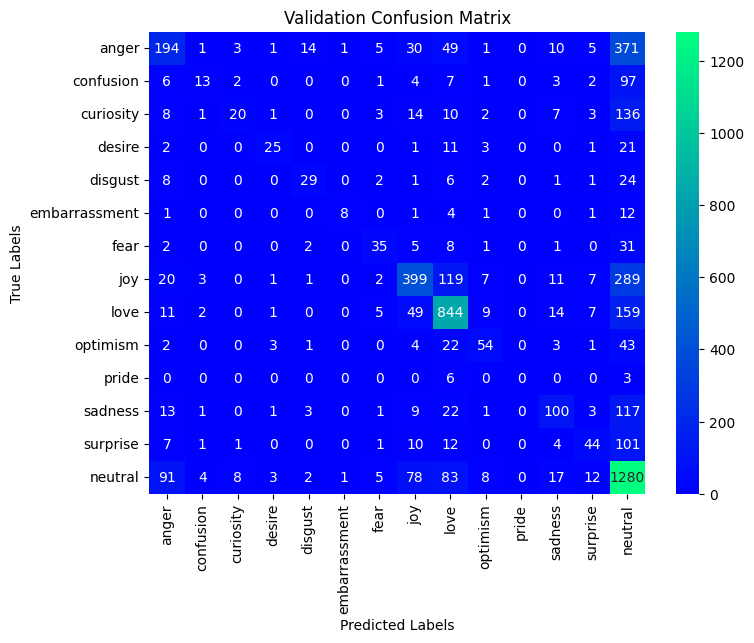

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Classification Report:
                precision    recall  f1-score   support

        anger      0.532     0.283     0.370       685
    confusion      0.500     0.096     0.160       136
    curiosity      0.588     0.098     0.167       205
       desire      0.694     0.391     0.500        64
      disgust      0.558     0.392     0.460        74
embarrassment      0.800     0.286     0.421        28
         fear      0.583     0.412     0.483        85
          joy      0.660     0.464     0.545       859
         love      0.702     0.767     0.733      1101
     optimism      0.600     0.406     0.484       133
        pride      0.000     0.000     0.000         9
      sadness      0.585     0.369     0.452       271
     surprise      0.506     0.243     0.328       181
      neutral      0.477     0.804     0.599      1592

     accuracy                          0.561      5423
    macro avg      0.556     0.358     0.407      5423
 weighted avg      0.579    

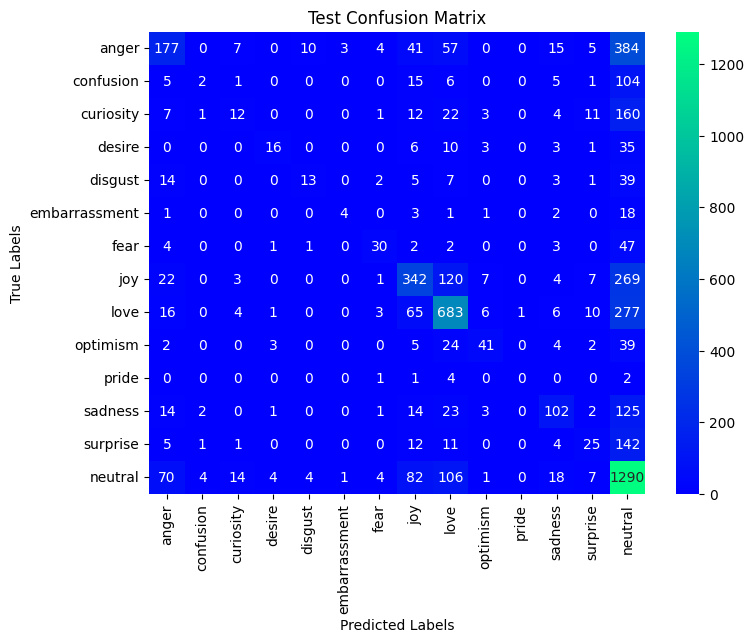

Test Classification Report:
                precision    recall  f1-score   support

        anger      0.525     0.252     0.340       703
    confusion      0.200     0.014     0.027       139
    curiosity      0.286     0.052     0.087       233
       desire      0.615     0.216     0.320        74
      disgust      0.464     0.155     0.232        84
embarrassment      0.500     0.133     0.211        30
         fear      0.638     0.333     0.438        90
          joy      0.565     0.441     0.496       775
         love      0.635     0.637     0.636      1072
     optimism      0.631     0.342     0.443       120
        pride      0.000     0.000     0.000         8
      sadness      0.590     0.355     0.443       287
     surprise      0.347     0.124     0.183       201
      neutral      0.440     0.804     0.569      1605

     accuracy                          0.505      5421
    macro avg      0.460     0.276     0.316      5421
 weighted avg      0.509     0.505

In [ ]:
# Model2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

label_dict = {
    2: 'anger',
    6: 'confusion',
    7: 'curiosity',
    8: 'desire',
    11: 'disgust',
    12: 'embarrassment',
    14: 'fear',
    17: 'joy',
    18: 'love',
    20: 'optimism',
    21: 'pride',
    25: 'sadness',
    26: 'surprise',
    27: 'neutral',
}


classifier = RandomForestClassifier(n_estimators=350,max_features="auto",random_state=42)


classifier.fit(X_train, y_train)


y_val_pred = classifier.predict(X_val)
conf_mat = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="winter", cbar=True,
            xticklabels=label_dict.values(), yticklabels=label_dict.values())
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

val_report = classification_report(y_val, y_val_pred, target_names=label_dict.values(), digits=3)
print("Validation Classification Report:\n", val_report)

y_test_pred = classifier.predict(X_test)
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="winter", cbar=True,
            xticklabels=label_dict.values(), yticklabels=label_dict.values())
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

test_report = classification_report(y_test, y_test_pred, target_names=label_dict.values(), digits=3)
print("Test Classification Report:\n", test_report)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


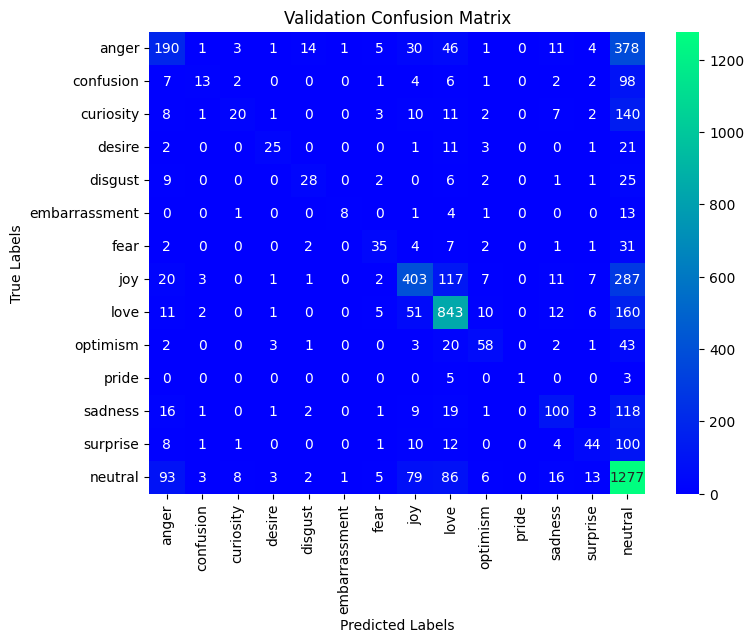

Validation Classification Report:
                precision    recall  f1-score   support

        anger      0.516     0.277     0.361       685
    confusion      0.520     0.096     0.161       136
    curiosity      0.571     0.098     0.167       205
       desire      0.694     0.391     0.500        64
      disgust      0.560     0.378     0.452        74
embarrassment      0.800     0.286     0.421        28
         fear      0.583     0.412     0.483        85
          joy      0.666     0.469     0.551       859
         love      0.707     0.766     0.735      1101
     optimism      0.617     0.436     0.511       133
        pride      1.000     0.111     0.200         9
      sadness      0.599     0.369     0.457       271
     surprise      0.518     0.243     0.331       181
      neutral      0.474     0.802     0.596      1592

     accuracy                          0.561      5423
    macro avg      0.630     0.367     0.423      5423
 weighted avg      0.581    

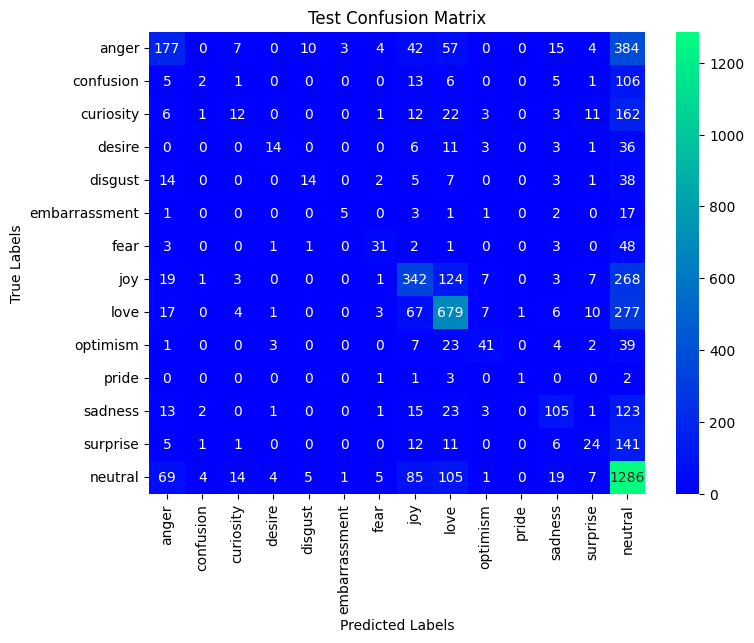

Test Classification Report:
                precision    recall  f1-score   support

        anger      0.536     0.252     0.343       703
    confusion      0.182     0.014     0.027       139
    curiosity      0.286     0.052     0.087       233
       desire      0.583     0.189     0.286        74
      disgust      0.467     0.167     0.246        84
embarrassment      0.556     0.167     0.256        30
         fear      0.633     0.344     0.446        90
          joy      0.559     0.441     0.493       775
         love      0.633     0.633     0.633      1072
     optimism      0.621     0.342     0.441       120
        pride      0.500     0.125     0.200         8
      sadness      0.593     0.366     0.453       287
     surprise      0.348     0.119     0.178       201
      neutral      0.439     0.801     0.568      1605

     accuracy                          0.504      5421
    macro avg      0.495     0.287     0.333      5421
 weighted avg      0.509     0.504

In [ ]:
# Model3
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

label_dict = {
    2: 'anger',
    6: 'confusion',
    7: 'curiosity',
    8: 'desire',
    11: 'disgust',
    12: 'embarrassment',
    14: 'fear',
    17: 'joy',
    18: 'love',
    20: 'optimism',
    21: 'pride',
    25: 'sadness',
    26: 'surprise',
    27: 'neutral',
}

classifier = RandomForestClassifier(n_estimators=500,max_features="auto", random_state=42)


classifier.fit(X_train, y_train)

y_val_pred = classifier.predict(X_val)
conf_mat = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="winter", cbar=True, xticklabels=label_dict.values(), yticklabels=label_dict.values())
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


val_report = classification_report(y_val, y_val_pred, target_names=label_dict.values(), digits=3)
print("Validation Classification Report:\n", val_report)

y_test_pred = classifier.predict(X_test)
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="winter", cbar=True, xticklabels=label_dict.values(), yticklabels=label_dict.values())
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

test_report = classification_report(y_test, y_test_pred, target_names=label_dict.values(), digits=3)
print("Test Classification Report:\n", test_report)

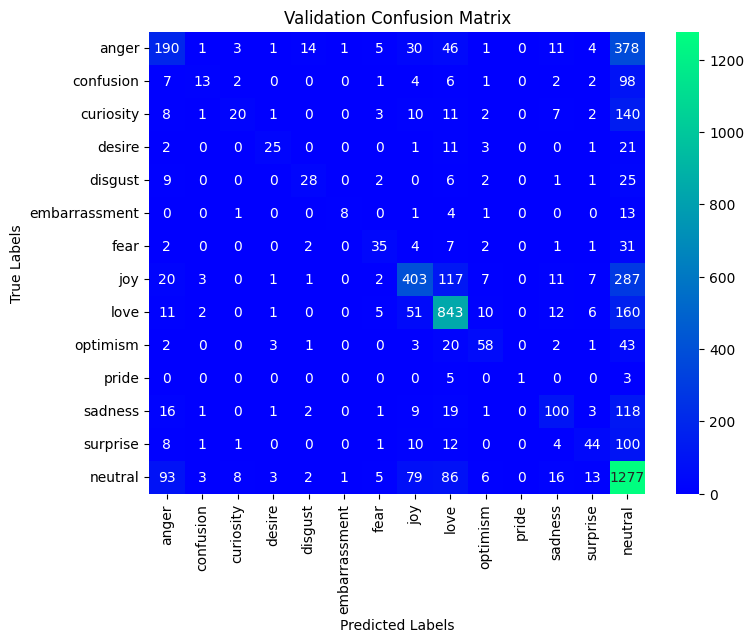

Validation Classification Report:
                precision    recall  f1-score   support

        anger       0.52      0.28      0.36       685
    confusion       0.52      0.10      0.16       136
    curiosity       0.57      0.10      0.17       205
       desire       0.69      0.39      0.50        64
      disgust       0.56      0.38      0.45        74
embarrassment       0.80      0.29      0.42        28
         fear       0.58      0.41      0.48        85
          joy       0.67      0.47      0.55       859
         love       0.71      0.77      0.73      1101
     optimism       0.62      0.44      0.51       133
        pride       1.00      0.11      0.20         9
      sadness       0.60      0.37      0.46       271
     surprise       0.52      0.24      0.33       181
      neutral       0.47      0.80      0.60      1592

     accuracy                           0.56      5423
    macro avg       0.63      0.37      0.42      5423
 weighted avg       0.58    

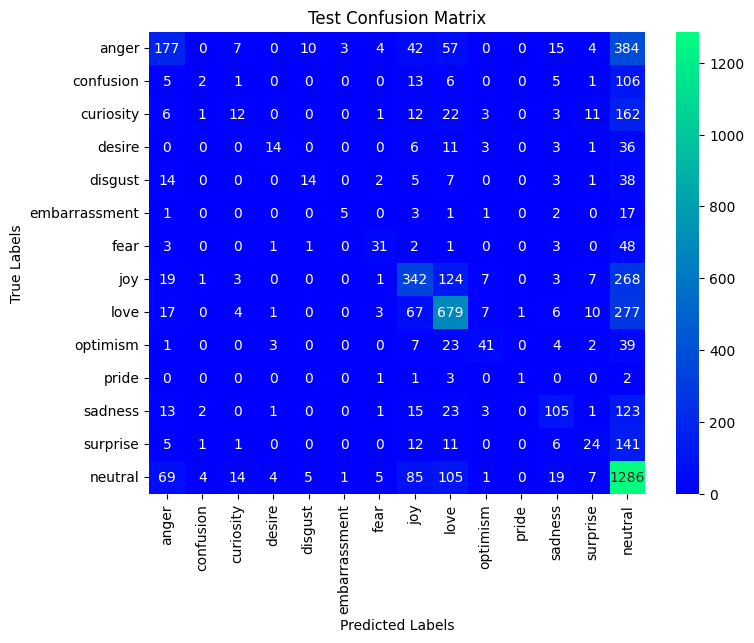

Test Classification Report:
                precision    recall  f1-score   support

        anger       0.54      0.25      0.34       703
    confusion       0.18      0.01      0.03       139
    curiosity       0.29      0.05      0.09       233
       desire       0.58      0.19      0.29        74
      disgust       0.47      0.17      0.25        84
embarrassment       0.56      0.17      0.26        30
         fear       0.63      0.34      0.45        90
          joy       0.56      0.44      0.49       775
         love       0.63      0.63      0.63      1072
     optimism       0.62      0.34      0.44       120
        pride       0.50      0.12      0.20         8
      sadness       0.59      0.37      0.45       287
     surprise       0.35      0.12      0.18       201
      neutral       0.44      0.80      0.57      1605

     accuracy                           0.50      5421
    macro avg       0.50      0.29      0.33      5421
 weighted avg       0.51      0.50

In [ ]:
# Model4
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

label_dict = {
    2: 'anger',
    6: 'confusion',
    7: 'curiosity',
    8: 'desire',
    11: 'disgust',
    12: 'embarrassment',
    14: 'fear',
    17: 'joy',
    18: 'love',
    20: 'optimism',
    21: 'pride',
    25: 'sadness',
    26: 'surprise',
    27: 'neutral',
}


classifier = RandomForestClassifier(n_estimators=500,max_features="sqrt", random_state=42)


classifier.fit(X_train, y_train)

y_val_pred = classifier.predict(X_val)
conf_mat = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="winter", cbar=True,
            xticklabels=label_dict.values(), yticklabels=label_dict.values())
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


val_report = classification_report(y_val, y_val_pred, target_names=label_dict.values(), digits=3)
print("Validation Classification Report:\n", val_report)

y_test_pred = classifier.predict(X_test)
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="winter", cbar=True,
            xticklabels=label_dict.values(), yticklabels=label_dict.values())
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

test_report = classification_report(y_test, y_test_pred, target_names=label_dict.values(), digits=3)
print("Test Classification Report:\n", test_report)

In [ ]:
!pip install --upgrade scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


n_estimators=100: accuracy=0.505
n_estimators=200: accuracy=0.507
n_estimators=250: accuracy=0.506
n_estimators=300: accuracy=0.506
n_estimators=400: accuracy=0.504
n_estimators=500: accuracy=0.504


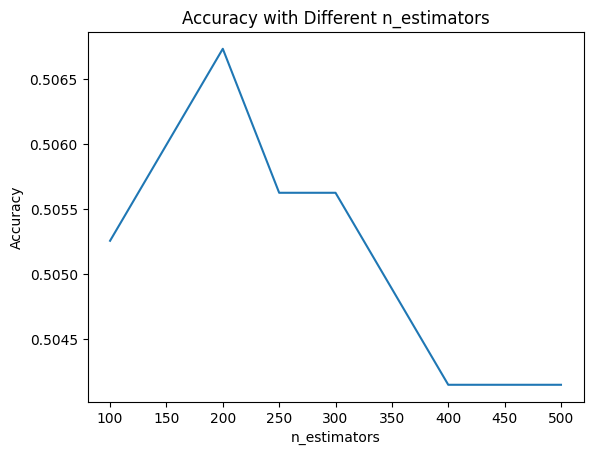

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

n_estimators_list = [100, 200, 250, 300, 400, 500]

classifier = RandomForestClassifier(random_state=42)

accuracy_scores = []

for n in n_estimators_list:
  classifier.set_params(n_estimators=n)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_scores.append(accuracy)

for i in range(len(n_estimators_list)):
    print(f"n_estimators={n_estimators_list[i]}: accuracy={accuracy_scores[i]:.3f}")

plt.plot(n_estimators_list, accuracy_scores)
plt.title("Accuracy with Different n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.show()


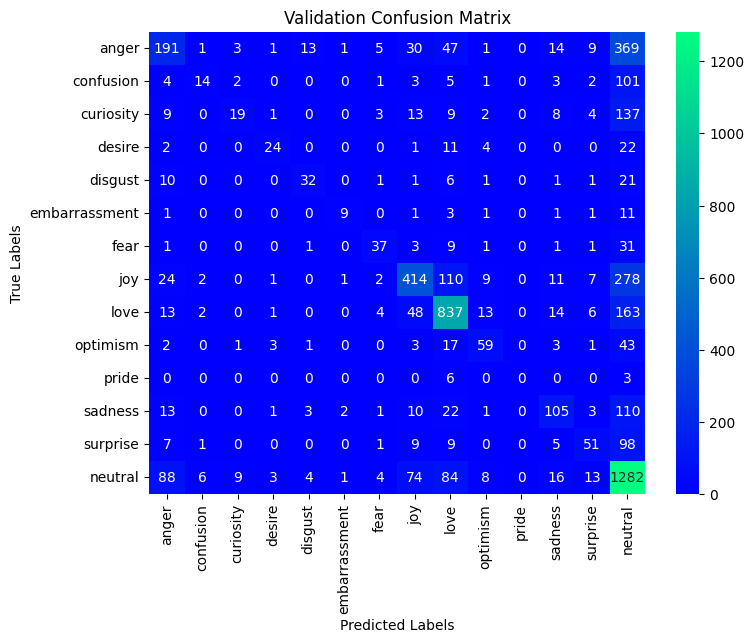

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Classification Report:
                precision    recall  f1-score   support

        anger      0.523     0.279     0.364       685
    confusion      0.538     0.103     0.173       136
    curiosity      0.559     0.093     0.159       205
       desire      0.686     0.375     0.485        64
      disgust      0.593     0.432     0.500        74
embarrassment      0.643     0.321     0.429        28
         fear      0.627     0.435     0.514        85
          joy      0.679     0.482     0.564       859
         love      0.712     0.760     0.736      1101
     optimism      0.584     0.444     0.504       133
        pride      0.000     0.000     0.000         9
      sadness      0.577     0.387     0.464       271
     surprise      0.515     0.282     0.364       181
      neutral      0.480     0.805     0.602      1592

     accuracy                          0.567      5423
    macro avg      0.551     0.371     0.418      5423
 weighted avg      0.584    

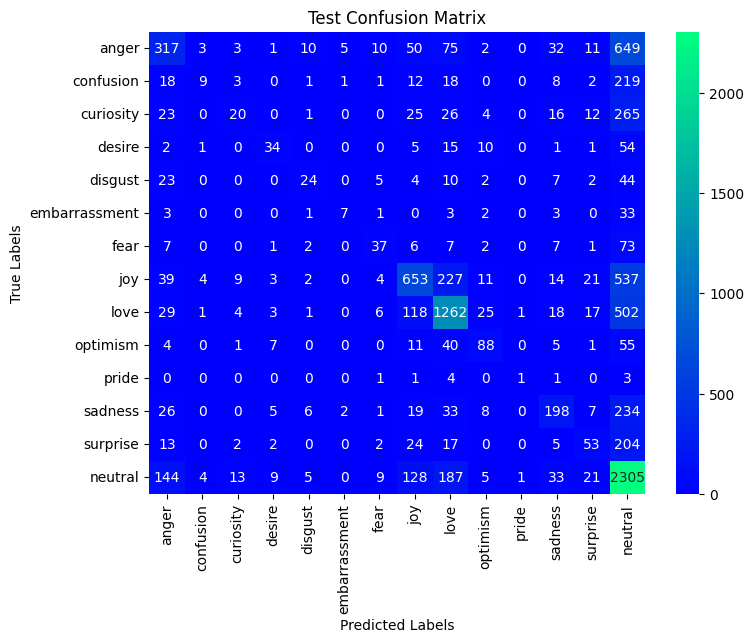

Test Classification Report:
                precision    recall  f1-score   support

        anger      0.489     0.271     0.349      1168
    confusion      0.409     0.031     0.057       292
    curiosity      0.364     0.051     0.089       392
       desire      0.523     0.276     0.362       123
      disgust      0.453     0.198     0.276       121
embarrassment      0.467     0.132     0.206        53
         fear      0.481     0.259     0.336       143
          joy      0.618     0.428     0.506      1524
         love      0.656     0.635     0.645      1987
     optimism      0.553     0.415     0.474       212
        pride      0.333     0.091     0.143        11
      sadness      0.569     0.367     0.446       539
     surprise      0.356     0.165     0.225       322
      neutral      0.445     0.805     0.573      2864

     accuracy                          0.514      9751
    macro avg      0.480     0.295     0.335      9751
 weighted avg      0.524     0.514

In [ ]:
# Model4
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

label_dict = {
    2: 'anger',
    6: 'confusion',
    7: 'curiosity',
    8: 'desire',
    11: 'disgust',
    12: 'embarrassment',
    14: 'fear',
    17: 'joy',
    18: 'love',
    20: 'optimism',
    21: 'pride',
    25: 'sadness',
    26: 'surprise',
    27: 'neutral',
}


classifier = RandomForestClassifier(n_estimators=200,  random_state=42)


classifier.fit(X_train, y_train)


y_val_pred = classifier.predict(X_val)
conf_mat = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="winter", cbar=True,
            xticklabels=label_dict.values(), yticklabels=label_dict.values())
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


val_report = classification_report(y_val, y_val_pred, target_names=label_dict.values(), digits=3)
print("Validation Classification Report:\n", val_report)


y_test_pred = classifier.predict(X_test)
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="winter", cbar=True,
            xticklabels=label_dict.values(), yticklabels=label_dict.values())
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

test_report = classification_report(y_test, y_test_pred, target_names=label_dict.values(), digits=3)
print("Test Classification Report:\n", test_report)

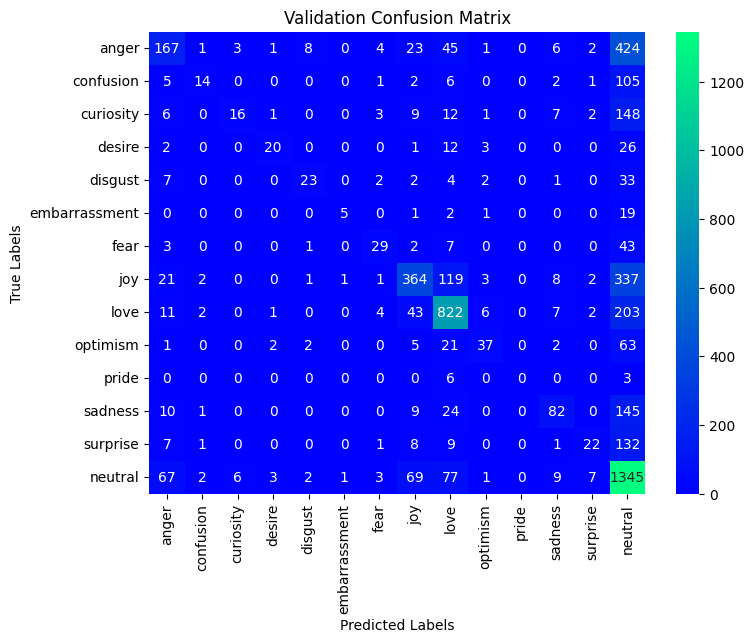

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Classification Report:
                precision    recall  f1-score   support

        anger      0.544     0.244     0.337       685
    confusion      0.609     0.103     0.176       136
    curiosity      0.640     0.078     0.139       205
       desire      0.714     0.312     0.435        64
      disgust      0.622     0.311     0.414        74
embarrassment      0.714     0.179     0.286        28
         fear      0.604     0.341     0.436        85
          joy      0.677     0.424     0.521       859
         love      0.705     0.747     0.725      1101
     optimism      0.673     0.278     0.394       133
        pride      0.000     0.000     0.000         9
      sadness      0.656     0.303     0.414       271
     surprise      0.579     0.122     0.201       181
      neutral      0.444     0.845     0.583      1592

     accuracy                          0.543      5423
    macro avg      0.584     0.306     0.361      5423
 weighted avg      0.588    

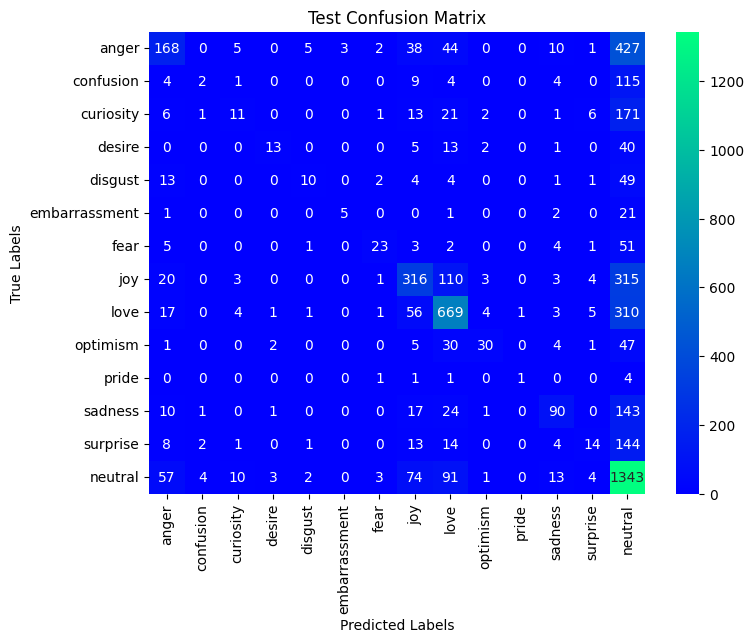

Test Classification Report:
                precision    recall  f1-score   support

        anger      0.542     0.239     0.332       703
    confusion      0.200     0.014     0.027       139
    curiosity      0.314     0.047     0.082       233
       desire      0.650     0.176     0.277        74
      disgust      0.500     0.119     0.192        84
embarrassment      0.625     0.167     0.263        30
         fear      0.676     0.256     0.371        90
          joy      0.570     0.408     0.476       775
         love      0.651     0.624     0.637      1072
     optimism      0.698     0.250     0.368       120
        pride      0.500     0.125     0.200         8
      sadness      0.643     0.314     0.422       287
     surprise      0.378     0.070     0.118       201
      neutral      0.422     0.837     0.561      1605

     accuracy                          0.497      5421
    macro avg      0.526     0.260     0.309      5421
 weighted avg      0.520     0.497

In [ ]:
# Model5
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

label_dict = {
    2: 'anger',
    6: 'confusion',
    7: 'curiosity',
    8: 'desire',
    11: 'disgust',
    12: 'embarrassment',
    14: 'fear',
    17: 'joy',
    18: 'love',
    20: 'optimism',
    21: 'pride',
    25: 'sadness',
    26: 'surprise',
    27: 'neutral',
}


classifier = RandomForestClassifier(n_estimators=200, max_features="log2", random_state=42)


classifier.fit(X_train, y_train)


y_val_pred = classifier.predict(X_val)
conf_mat = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="winter", cbar=True, xticklabels=label_dict.values(), yticklabels=label_dict.values())
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


val_report = classification_report(y_val, y_val_pred, target_names=label_dict.values(), digits=3)
print("Validation Classification Report:\n", val_report)

y_test_pred = classifier.predict(X_test)
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="winter", cbar=True,
            xticklabels=label_dict.values(), yticklabels=label_dict.values())
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

test_report = classification_report(y_test, y_test_pred, target_names=label_dict.values(), digits=3)
print("Test Classification Report:\n", test_report)

#Experiment3: fine-tuning vs. full training for electra


1.   Model1: fine-tuning
2.   Model2: full training: unfreeze 6 layers
3.   Model3: full training: unfreeze 8 layers
4.   Model4: full training: unfreeze 10 layers



In [ ]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Fine-tuning(pretrained model: electra by google)-Model1



In [ ]:
import pandas as pd
import numpy as np
import torch
from transformers import ElectraTokenizer, ElectraForSequenceClassification,ElectraForPreTraining, ElectraTokenizerFast, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification
# label mapping dictionary
label_mapping = {label: idx for idx, label in enumerate(label_dict)}
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

label_dict = {
    2: 'anger',
    6: 'confusion',
    7: 'curiosity',
    8: 'desire',
    11: 'disgust',
    12: 'embarrassment',
    14: 'fear',
    17: 'joy',
    18: 'love',
    20: 'optimism',
    21: 'pride',
    25: 'sadness',
    26: 'surprise',
    27: 'neutral',
}

label_mapping = {k: i for i, k in enumerate(label_dict.keys())}
reverse_label_mapping = {v: k for k, v in label_mapping.items()}


class MyDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

data_df["labels"] = data_df["labels"].map(label_mapping)
val_df["labels"] = val_df["labels"].map(label_mapping)
test_df["labels"] = test_df["labels"].map(label_mapping)

model_name = "google/electra-small-discriminator"
tokenizer = ElectraTokenizerFast.from_pretrained(model_name)
model = ElectraForSequenceClassification.from_pretrained(model_name, num_labels=len(label_dict))

# input
train_encodings = tokenizer(data_df["text"].tolist(), truncation=True, padding=True, max_length=256)
val_encodings = tokenizer(val_df["text"].tolist(), truncation=True, padding=True, max_length=256)

train_dataset = MyDataset(train_encodings, data_df["labels"].tolist())
val_dataset = MyDataset(val_encodings, val_df["labels"].tolist())

#DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=False)

optimizer = AdamW(model.parameters(), lr=1e-4)

#learning rate scheduler
num_training_steps = len(train_dataloader) * 3  # 3
num_warmup_steps = int(0.1 * num_training_steps)  # 10% warmup
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps, num_training_steps)
loss_fn = torch.nn.CrossEntropyLoss()


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model.train()

val_accuracies = []

for epoch in range(5):
    print(f"Epoch {epoch + 1}")

    train_iterator = tqdm(train_dataloader, desc="Training", position=0, leave=True)

    for batch in train_iterator:
        optimizer.zero_grad()

        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        loss = loss_fn(logits, labels)

        loss.backward()

        optimizer.step()
        scheduler.step()

    model.eval()
    val_loss = 0
    num_val_batches = 0
    correct_predictions = 0

    val_iterator = tqdm(val_dataloader, desc="Validation", position=0, leave=True)

    with torch.no_grad():
        for batch in val_iterator:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            logits = outputs.logits
            val_loss += outputs.loss.item()
            num_val_batches += 1
            correct_predictions += (logits.argmax(dim=1) == labels).sum().item()

    avg_val_loss = val_loss / num_val_batches
    val_accuracy = correct_predictions / len(val_dataset)
    val_accuracies.append(val_accuracy)

    print(f"Validation Loss: {avg_val_loss}")
    print(f"Validation Accuracy: {val_accuracy}")

    model.train()


Some weights of the model checkpoint at google/electra-small-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-small-discriminator and are newly initialized: ['classifier

Epoch 1


Training:   0%|          | 0/2433 [00:00<?, ?it/s]

Validation:   0%|          | 0/339 [00:00<?, ?it/s]

Validation Loss: 1.4724866237963898
Validation Accuracy: 0.5441637470035036
Epoch 2


Training:   0%|          | 0/2433 [00:00<?, ?it/s]

Validation:   0%|          | 0/339 [00:00<?, ?it/s]

Validation Loss: 1.3542697934274477
Validation Accuracy: 0.5775401069518716
Epoch 3


Training:   0%|          | 0/2433 [00:00<?, ?it/s]

Validation:   0%|          | 0/339 [00:00<?, ?it/s]

Validation Loss: 1.3371314720242424
Validation Accuracy: 0.5862068965517241
Epoch 4


Training:   0%|          | 0/2433 [00:00<?, ?it/s]

Validation:   0%|          | 0/339 [00:00<?, ?it/s]

Validation Loss: 1.3371314720242424
Validation Accuracy: 0.5862068965517241
Epoch 5


Training:   0%|          | 0/2433 [00:00<?, ?it/s]

Validation:   0%|          | 0/339 [00:00<?, ?it/s]

Validation Loss: 1.3371314720242424
Validation Accuracy: 0.5862068965517241


Full trainning(electra by google)-Model2: unfreeze 6 layers

In [ ]:
import pandas as pd
import numpy as np
import torch
from transformers import ElectraTokenizer, ElectraForSequenceClassification,ElectraForPreTraining, ElectraTokenizerFast, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification

label_mapping = {label: idx for idx, label in enumerate(label_dict)}
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

label_dict = {
    2: 'anger',
    6: 'confusion',
    7: 'curiosity',
    8: 'desire',
    11: 'disgust',
    12: 'embarrassment',
    14: 'fear',
    17: 'joy',
    18: 'love',
    20: 'optimism',
    21: 'pride',
    25: 'sadness',
    26: 'surprise',
    27: 'neutral',
}

label_mapping = {k: i for i, k in enumerate(label_dict.keys())}
reverse_label_mapping = {v: k for k, v in label_mapping.items()}


class MyDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)


data_df["labels"] = data_df["labels"].map(label_mapping)
val_df["labels"] = val_df["labels"].map(label_mapping)
test_df["labels"] = test_df["labels"].map(label_mapping)

model_name = "google/electra-small-discriminator"
tokenizer = ElectraTokenizerFast.from_pretrained(model_name)
model = ElectraForSequenceClassification.from_pretrained(model_name, num_labels=len(label_dict))

num_layers = len(model.electra.encoder.layer)
print(f"The ELECTRA model has {num_layers} layers.")


# full training-unfreeze layers
freeze_layers = 6
num_layers = len(model.electra.encoder.layer)
unfreeze_layers = num_layers - freeze_layers

# Set the layer to be trained to be gradient back-propagated
for param in model.electra.embeddings.parameters():
    param.requires_grad = True
for i in range(unfreeze_layers):
    for param in model.electra.encoder.layer[-1-i].parameters():
        param.requires_grad = True

# for param in model.electra.embeddings.parameters():
#     param.requires_grad = True
# for param in model.electra.pooler.parameters():
#     param.requires_grad = True
# for param in model.classifier.parameters():
#     param.requires_grad = True
# for i in range(len(model.electra.encoder.layer)):
#     for param in model.electra.encoder.layer[-1-i].parameters():
#         param.requires_grad = True


train_encodings = tokenizer(data_df["text"].tolist(), truncation=True, padding=True, max_length=256)
val_encodings = tokenizer(val_df["text"].tolist(), truncation=True, padding=True, max_length=256)

train_dataset = MyDataset(train_encodings, data_df["labels"].tolist())
val_dataset = MyDataset(val_encodings, val_df["labels"].tolist())


train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=False)


optimizer = AdamW(model.parameters(), lr=1e-4)


num_training_steps = len(train_dataloader) * 3
num_warmup_steps = int(0.1 * num_training_steps)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps, num_training_steps)
loss_fn = torch.nn.CrossEntropyLoss()


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model.train()

val_accuracies = []

for epoch in range(5):
    print(f"Epoch {epoch + 1}")

    train_iterator = tqdm(train_dataloader, desc="Training", position=0, leave=True)

    for batch in train_iterator:
        optimizer.zero_grad()

        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        loss = loss_fn(logits, labels)

        loss.backward()

        optimizer.step()
        scheduler.step()

    model.eval()
    val_loss = 0
    num_val_batches = 0
    correct_predictions = 0

    val_iterator = tqdm(val_dataloader, desc="Validation", position=0, leave=True)

    with torch.no_grad():
        for batch in val_iterator:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            logits = outputs.logits
            val_loss += outputs.loss.item()
            num_val_batches += 1
            correct_predictions += (logits.argmax(dim=1) == labels).sum().item()

    avg_val_loss = val_loss / num_val_batches
    val_accuracy = correct_predictions / len(val_dataset)
    val_accuracies.append(val_accuracy)

    print(f"Validation Loss: {avg_val_loss}")
    print(f"Validation Accuracy: {val_accuracy}")

    model.train()


Some weights of the model checkpoint at google/electra-small-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.weight']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-small-discriminator and are newly initialized: ['classifier

The ELECTRA model has 12 layers.


/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1


Training:   0%|          | 0/2702 [00:00<?, ?it/s]

Validation:   0%|          | 0/339 [00:00<?, ?it/s]

Validation Loss: 1.5268769726640707
Validation Accuracy: 0.5332841600590079
Epoch 2


Training:   0%|          | 0/2702 [00:00<?, ?it/s]

Validation:   0%|          | 0/339 [00:00<?, ?it/s]

Validation Loss: 1.3906296188324954
Validation Accuracy: 0.5657385211137747
Epoch 3


Training:   0%|          | 0/2702 [00:00<?, ?it/s]

Validation:   0%|          | 0/339 [00:00<?, ?it/s]

Validation Loss: 1.3526718957585924
Validation Accuracy: 0.5801217038539553
Epoch 4


Training:   0%|          | 0/2702 [00:00<?, ?it/s]

Validation:   0%|          | 0/339 [00:00<?, ?it/s]

Validation Loss: 1.3526718957585924
Validation Accuracy: 0.5801217038539553
Epoch 5


Training:   0%|          | 0/2702 [00:00<?, ?it/s]

Validation:   0%|          | 0/339 [00:00<?, ?it/s]

Validation Loss: 1.3526718957585924
Validation Accuracy: 0.5801217038539553


Full trainning(electra by google)-Model2: unfreeze 8 layers

In [ ]:
import pandas as pd
import numpy as np
import torch
from transformers import ElectraTokenizer, ElectraForSequenceClassification,ElectraForPreTraining, ElectraTokenizerFast, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification
# 创建标签映射字典
label_mapping = {label: idx for idx, label in enumerate(label_dict)}
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

label_dict = {
    2: 'anger',
    6: 'confusion',
    7: 'curiosity',
    8: 'desire',
    11: 'disgust',
    12: 'embarrassment',
    14: 'fear',
    17: 'joy',
    18: 'love',
    20: 'optimism',
    21: 'pride',
    25: 'sadness',
    26: 'surprise',
    27: 'neutral',
}

label_mapping = {k: i for i, k in enumerate(label_dict.keys())}
reverse_label_mapping = {v: k for k, v in label_mapping.items()}


class MyDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

data_df["labels"] = data_df["labels"].map(label_mapping)
val_df["labels"] = val_df["labels"].map(label_mapping)
test_df["labels"] = test_df["labels"].map(label_mapping)

model_name = "google/electra-small-discriminator"
tokenizer = ElectraTokenizerFast.from_pretrained(model_name)
model = ElectraForSequenceClassification.from_pretrained(model_name, num_labels=len(label_dict))

num_layers = len(model.electra.encoder.layer)
print(f"The ELECTRA model has {num_layers} layers.")


freeze_layers = 4
num_layers = len(model.electra.encoder.layer)
unfreeze_layers = num_layers - freeze_layers

for param in model.electra.embeddings.parameters():
    param.requires_grad = True
for i in range(unfreeze_layers):
    for param in model.electra.encoder.layer[-1-i].parameters():
        param.requires_grad = True

# for param in model.electra.embeddings.parameters():
#     param.requires_grad = True
# for param in model.electra.pooler.parameters():
#     param.requires_grad = True
# for param in model.classifier.parameters():
#     param.requires_grad = True
# for i in range(len(model.electra.encoder.layer)):
#     for param in model.electra.encoder.layer[-1-i].parameters():
#         param.requires_grad = True


train_encodings = tokenizer(data_df["text"].tolist(), truncation=True, padding=True, max_length=256)
val_encodings = tokenizer(val_df["text"].tolist(), truncation=True, padding=True, max_length=256)

train_dataset = MyDataset(train_encodings, data_df["labels"].tolist())
val_dataset = MyDataset(val_encodings, val_df["labels"].tolist())


train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=False)


optimizer = AdamW(model.parameters(), lr=1e-4)


num_training_steps = len(train_dataloader) * 3
num_warmup_steps = int(0.1 * num_training_steps)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps, num_training_steps)
loss_fn = torch.nn.CrossEntropyLoss()


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model.train()

val_accuracies = []

for epoch in range(5):
    print(f"Epoch {epoch + 1}")

    train_iterator = tqdm(train_dataloader, desc="Training", position=0, leave=True)

    for batch in train_iterator:
        optimizer.zero_grad()

        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        loss = loss_fn(logits, labels)

        loss.backward()

        optimizer.step()
        scheduler.step()

    model.eval()
    val_loss = 0
    num_val_batches = 0
    correct_predictions = 0

    val_iterator = tqdm(val_dataloader, desc="Validation", position=0, leave=True)

    with torch.no_grad():
        for batch in val_iterator:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            logits = outputs.logits
            val_loss += outputs.loss.item()
            num_val_batches += 1
            correct_predictions += (logits.argmax(dim=1) == labels).sum().item()

    avg_val_loss = val_loss / num_val_batches
    val_accuracy = correct_predictions / len(val_dataset)
    val_accuracies.append(val_accuracy)

    print(f"Validation Loss: {avg_val_loss}")
    print(f"Validation Accuracy: {val_accuracy}")

    model.train()


Some weights of the model checkpoint at google/electra-small-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-small-discriminator and are newly initialized: ['classifier

The ELECTRA model has 12 layers.


/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1


Training:   0%|          | 0/2702 [00:00<?, ?it/s]

Validation:   0%|          | 0/339 [00:00<?, ?it/s]

Validation Loss: 1.5062241420633322
Validation Accuracy: 0.5279365664761202
Epoch 2


Training:   0%|          | 0/2702 [00:00<?, ?it/s]

Validation:   0%|          | 0/339 [00:00<?, ?it/s]

Validation Loss: 1.3873487219522134
Validation Accuracy: 0.5688733173520192
Epoch 3


Training:   0%|          | 0/2702 [00:00<?, ?it/s]

Validation:   0%|          | 0/339 [00:00<?, ?it/s]

Validation Loss: 1.367926248055292
Validation Accuracy: 0.5768025078369906
Epoch 4


Training:   0%|          | 0/2702 [00:00<?, ?it/s]

Validation:   0%|          | 0/339 [00:00<?, ?it/s]

Validation Loss: 1.367926248055292
Validation Accuracy: 0.5768025078369906
Epoch 5


Training:   0%|          | 0/2702 [00:00<?, ?it/s]

Validation:   0%|          | 0/339 [00:00<?, ?it/s]

Validation Loss: 1.367926248055292
Validation Accuracy: 0.5768025078369906


Full trainning(electra by google)-Model2: unfreeze 12 layers

In [ ]:
import pandas as pd
import numpy as np
import torch
from transformers import ElectraTokenizer, ElectraForSequenceClassification,ElectraForPreTraining, ElectraTokenizerFast, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification

label_mapping = {label: idx for idx, label in enumerate(label_dict)}
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

label_dict = {
    2: 'anger',
    6: 'confusion',
    7: 'curiosity',
    8: 'desire',
    11: 'disgust',
    12: 'embarrassment',
    14: 'fear',
    17: 'joy',
    18: 'love',
    20: 'optimism',
    21: 'pride',
    25: 'sadness',
    26: 'surprise',
    27: 'neutral',
}

label_mapping = {k: i for i, k in enumerate(label_dict.keys())}
reverse_label_mapping = {v: k for k, v in label_mapping.items()}


class MyDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)


data_df["labels"] = data_df["labels"].map(label_mapping)
val_df["labels"] = val_df["labels"].map(label_mapping)
test_df["labels"] = test_df["labels"].map(label_mapping)

model_name = "google/electra-small-discriminator"
tokenizer = ElectraTokenizerFast.from_pretrained(model_name)
model = ElectraForSequenceClassification.from_pretrained(model_name, num_labels=len(label_dict))

num_layers = len(model.electra.encoder.layer)
print(f"The ELECTRA model has {num_layers} layers.")


freeze_layers = 0
num_layers = len(model.electra.encoder.layer)
unfreeze_layers = num_layers - freeze_layers


for param in model.electra.embeddings.parameters():
    param.requires_grad = True
for i in range(unfreeze_layers):
    for param in model.electra.encoder.layer[-1-i].parameters():
        param.requires_grad = True

# for param in model.electra.embeddings.parameters():
#     param.requires_grad = True
# for param in model.electra.pooler.parameters():
#     param.requires_grad = True
# for param in model.classifier.parameters():
#     param.requires_grad = True
# for i in range(len(model.electra.encoder.layer)):
#     for param in model.electra.encoder.layer[-1-i].parameters():
#         param.requires_grad = True


train_encodings = tokenizer(data_df["text"].tolist(), truncation=True, padding=True, max_length=256)
val_encodings = tokenizer(val_df["text"].tolist(), truncation=True, padding=True, max_length=256)

train_dataset = MyDataset(train_encodings, data_df["labels"].tolist())
val_dataset = MyDataset(val_encodings, val_df["labels"].tolist())


train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=False)


optimizer = AdamW(model.parameters(), lr=1e-4)


num_training_steps = len(train_dataloader) * 3
num_warmup_steps = int(0.1 * num_training_steps)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps, num_training_steps)
loss_fn = torch.nn.CrossEntropyLoss()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model.train()

val_accuracies = []

for epoch in range(5):
    print(f"Epoch {epoch + 1}")

    train_iterator = tqdm(train_dataloader, desc="Training", position=0, leave=True)

    for batch in train_iterator:
        optimizer.zero_grad()

        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        loss = loss_fn(logits, labels)

        loss.backward()

        optimizer.step()
        scheduler.step()

    model.eval()
    val_loss = 0
    num_val_batches = 0
    correct_predictions = 0

    val_iterator = tqdm(val_dataloader, desc="Validation", position=0, leave=True)

    with torch.no_grad():
        for batch in val_iterator:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            logits = outputs.logits
            val_loss += outputs.loss.item()
            num_val_batches += 1
            correct_predictions += (logits.argmax(dim=1) == labels).sum().item()

    avg_val_loss = val_loss / num_val_batches
    val_accuracy = correct_predictions / len(val_dataset)
    val_accuracies.append(val_accuracy)

    print(f"Validation Loss: {avg_val_loss}")
    print(f"Validation Accuracy: {val_accuracy}")

    model.train()


Some weights of the model checkpoint at google/electra-small-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-small-discriminator and are newly initialized: ['classifier

The ELECTRA model has 12 layers.


/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1


Training:   0%|          | 0/2702 [00:00<?, ?it/s]

Validation:   0%|          | 0/339 [00:00<?, ?it/s]

Validation Loss: 1.4532712390289193
Validation Accuracy: 0.557624930850083
Epoch 2


Training:   0%|          | 0/2702 [00:00<?, ?it/s]

Validation:   0%|          | 0/339 [00:00<?, ?it/s]

Validation Loss: 1.355706297894143
Validation Accuracy: 0.5793841047390743
Epoch 3


Training:   0%|          | 0/2702 [00:00<?, ?it/s]

Validation:   0%|          | 0/339 [00:00<?, ?it/s]

Validation Loss: 1.322220387887814
Validation Accuracy: 0.5849160981006822
Epoch 4


Training:   0%|          | 0/2702 [00:00<?, ?it/s]

Validation:   0%|          | 0/339 [00:00<?, ?it/s]

Validation Loss: 1.322220387887814
Validation Accuracy: 0.5849160981006822
Epoch 5


Training:   0%|          | 0/2702 [00:00<?, ?it/s]

Validation:   0%|          | 0/339 [00:00<?, ?it/s]

Validation Loss: 1.322220387887814
Validation Accuracy: 0.5849160981006822


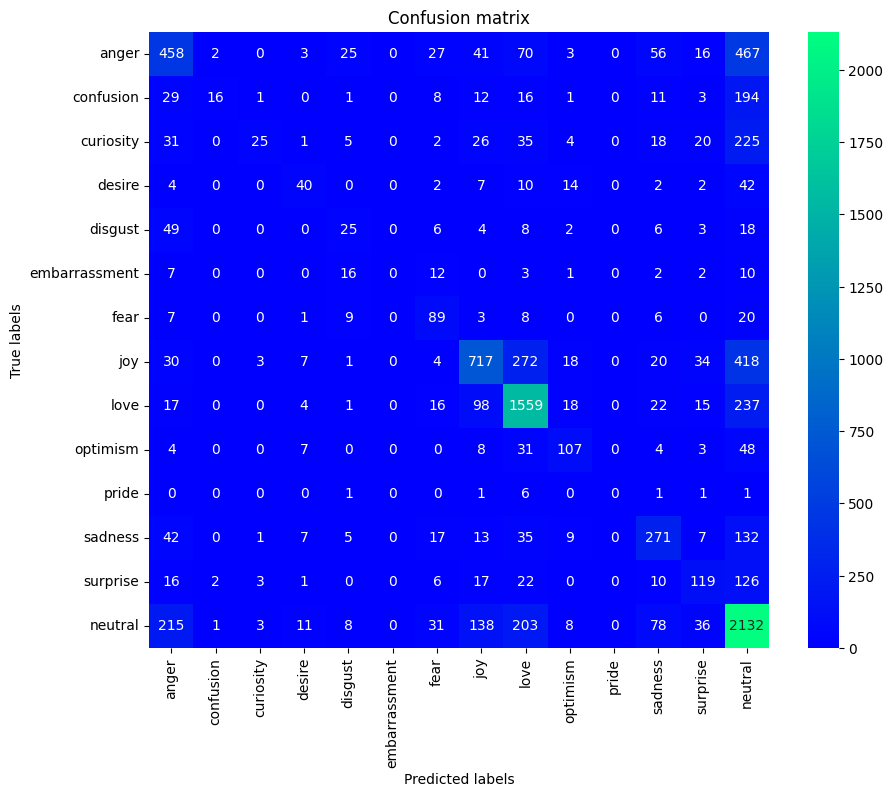

anger: 0.67
confusion: 0.53
curiosity: 0.53
desire: 0.66
disgust: 0.60
embarrassment: 0.50
fear: 0.80
joy: 0.71
love: 0.85
optimism: 0.75
pride: 0.50
sadness: 0.74
surprise: 0.68
neutral: 0.73
               precision    recall  f1-score   support

        anger      0.504     0.392     0.441      1168
    confusion      0.762     0.055     0.102       292
    curiosity      0.694     0.064     0.117       392
       desire      0.488     0.325     0.390       123
      disgust      0.258     0.207     0.229       121
embarrassment      0.000     0.000     0.000        53
         fear      0.405     0.622     0.490       143
          joy      0.661     0.470     0.550      1524
         love      0.684     0.785     0.731      1987
     optimism      0.578     0.505     0.539       212
        pride      0.000     0.000     0.000        11
      sadness      0.535     0.503     0.518       539
     surprise      0.456     0.370     0.408       322
      neutral      0.524     0.744  

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import pandas as pd
import torch
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt

num_classes = len(label_dict)

test_encodings = tokenizer(test_df["text"].tolist(), truncation=True, padding=True, max_length=256)
test_dataset = MyDataset(test_encodings, test_df["labels"].tolist())
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)

#eval
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        predictions.extend(torch.argmax(logits, dim=1).cpu().numpy())
        true_labels.extend(labels.cpu().numpy())


confusion_mat = confusion_matrix(true_labels, predictions)
confusion_df = pd.DataFrame(confusion_mat, index=label_dict.values(), columns=label_dict.values())


plt.figure(figsize=(10, 8))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='winter')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion matrix")
plt.show()


y_true_bin = label_binarize(true_labels, classes=list(label_mapping.values()))
y_pred_bin = label_binarize(predictions, classes=list(label_mapping.values()))


auc_scores = []
for i in range(num_classes):
    auc_score = roc_auc_score(y_true_bin[:, i], y_pred_bin[:, i])
    auc_scores.append(auc_score)


for emotion, auc_score in zip(label_dict.values(), auc_scores):
    print(f"{emotion}: {auc_score:.2f}")

from sklearn.metrics import classification_report

# Generate the classification report
print(classification_report(true_labels, predictions, target_names=label_dict.values(), digits=3))

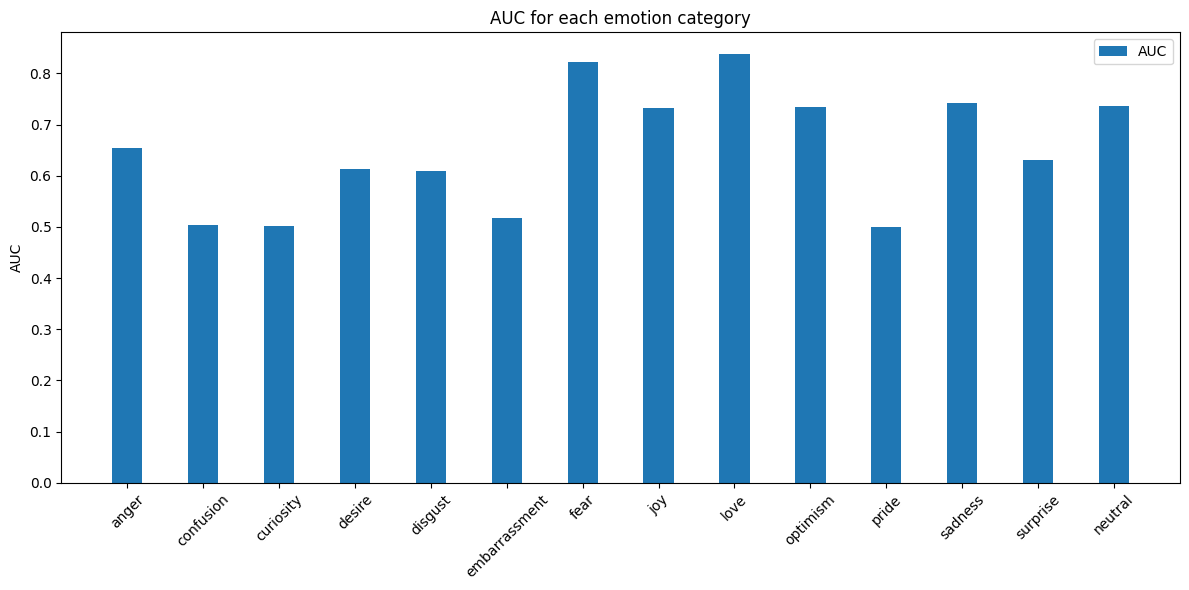

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
emotion_labels = list(label_dict.values())
x = np.arange(len(emotion_labels))
width = 0.4


plt.bar(x, auc_scores, width, label="AUC")


plt.xticks(x, emotion_labels, rotation=45)
plt.ylabel("AUC")
plt.title("AUC for each emotion category")
plt.legend()


plt.tight_layout()
plt.show()

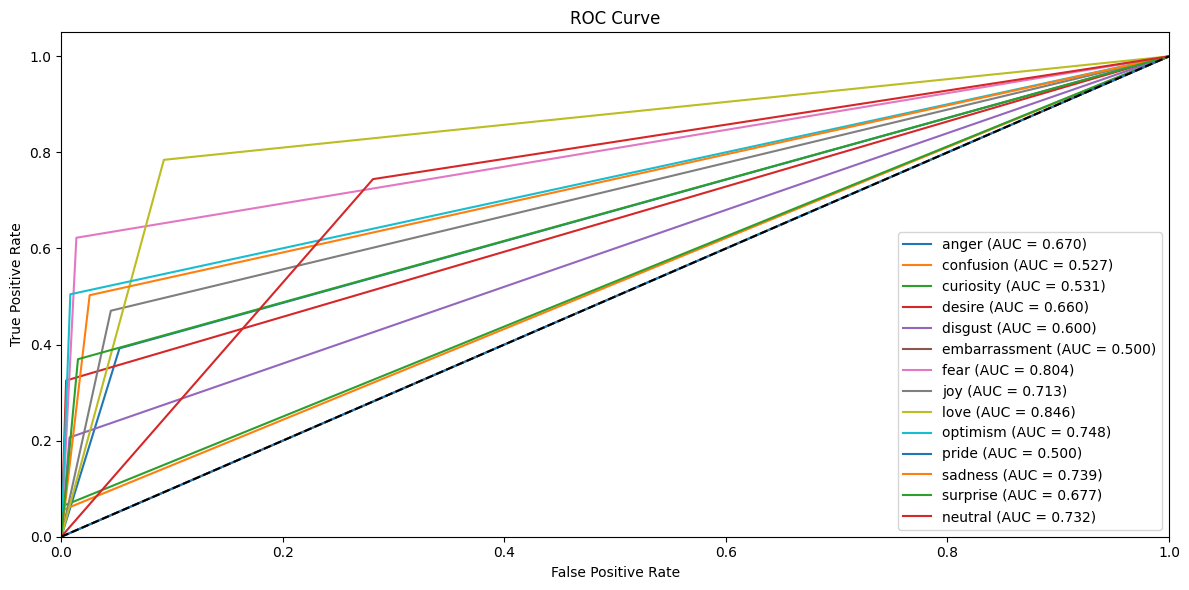

In [ ]:
from sklearn.metrics import roc_curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_pred_bin[:, i])


plt.figure(figsize=(12, 6))
emotion_labels = list(label_dict.values())
for i, emotion in enumerate(emotion_labels):
    plt.plot(fpr[i], tpr[i], label=f"{emotion} (AUC = {roc_auc[i]:.3f})")

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")


plt.tight_layout()
plt.show()

#Experiment4: Loss functions and Optimizers for electra model
1.   Optimizer: AdamW(Control group), Adam, Adafactor
2.   Loss functions: CrossEntropyLoss(Control group), BCEWithLogitsLoss





In [ ]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import torch
from transformers import ElectraTokenizer, ElectraForSequenceClassification,ElectraForPreTraining, ElectraTokenizerFast, AdamW, get_linear_schedule_with_warmup, Adafactor
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.optim import Adagrad

label_mapping = {label: idx for idx, label in enumerate(label_dict)}
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

label_dict = {
    2: 'anger',
    6: 'confusion',
    7: 'curiosity',
    8: 'desire',
    11: 'disgust',
    12: 'embarrassment',
    14: 'fear',
    17: 'joy',
    18: 'love',
    20: 'optimism',
    21: 'pride',
    25: 'sadness',
    26: 'surprise',
    27: 'neutral',
}

label_mapping = {k: i for i, k in enumerate(label_dict.keys())}
reverse_label_mapping = {v: k for k, v in label_mapping.items()}


class MyDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        # item["labels"] = torch.tensor(self.labels[idx], dtype=torch.long)
        # item["labels"] = torch.nn.functional.one_hot(torch.tensor(self.labels[idx]), num_classes=len(label_dict)).float()
        # item["labels"] = torch.nn.functional.one_hot(torch.tensor(int(self.labels[idx])), num_classes=len(label_dict)).long()
        item["labels"] = torch.nn.functional.one_hot(torch.tensor(int(self.labels[idx])), num_classes=len(label_dict)).float()
        return item

    def __len__(self):
        return len(self.labels)


data_df["labels"] = data_df["labels"].map(label_mapping)
val_df["labels"] = val_df["labels"].map(label_mapping)
test_df["labels"] = test_df["labels"].map(label_mapping)

model_name = "google/electra-small-discriminator"
tokenizer = ElectraTokenizerFast.from_pretrained(model_name)
model = ElectraForSequenceClassification.from_pretrained(model_name, num_labels=len(label_dict))


train_encodings = tokenizer(data_df["text"].tolist(), truncation=True, padding=True, max_length=256)
val_encodings = tokenizer(val_df["text"].tolist(), truncation=True, padding=True, max_length=256)

train_dataset = MyDataset(train_encodings, data_df["labels"].tolist())
val_dataset = MyDataset(val_encodings, val_df["labels"].tolist())

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=False)

optimizer = AdamW(model.parameters(), lr=1e-4)
# optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, momentum=0.9)
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=0.01)
# optimizer = Adafactor(model.parameters())
# optimizer = torch.optim.Adagrad(model.parameters(), lr=1e-4)



num_training_steps = len(train_dataloader) * 3
num_warmup_steps = int(0.1 * num_training_steps)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps, num_training_steps)
# loss_fn = torch.nn.CrossEntropyLoss()
loss_fn = torch.nn.BCEWithLogitsLoss()
# loss_fn = torch.nn.BCELoss()


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model.train()

val_accuracies = []

for epoch in range(8):
    print(f"Epoch {epoch + 1}")

    train_iterator = tqdm(train_dataloader, desc="Training", position=0, leave=True)

    for batch in train_iterator:
        optimizer.zero_grad()

        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        loss = loss_fn(logits, labels)
        # loss = loss_fn(logits, labels.squeeze())


        loss.backward()

        optimizer.step()
        scheduler.step()

    model.eval()
    val_loss = 0
    num_val_batches = 0
    correct_predictions = 0

    val_iterator = tqdm(val_dataloader, desc="Validation", position=0, leave=True)

    with torch.no_grad():
        for batch in val_iterator:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            logits = outputs.logits
            val_loss += outputs.loss.item()
            num_val_batches += 1
            # correct_predictions += (logits.argmax(dim=1) == labels).sum().item()
            correct_predictions += (logits.argmax(dim=1) == labels.argmax(dim=1)).sum().item()


    avg_val_loss = val_loss / num_val_batches
    val_accuracy = correct_predictions / len(val_dataset)
    val_accuracies.append(val_accuracy)

    print(f"Validation Loss: {avg_val_loss}")
    print(f"Validation Accuracy: {val_accuracy}")

    model.train()


In [ ]:
import numpy as np
import pandas as pd
import torch
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
import matplotlib.pyplot as plt

num_classes = len(label_dict)

test_encodings = tokenizer(test_df["text"].tolist(), truncation=True, padding=True, max_length=256)
test_dataset = MyDataset(test_encodings, test_df["labels"].tolist())
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)


model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        predictions.extend(torch.argmax(logits, dim=1).cpu().numpy())
        true_labels.extend(torch.argmax(labels, dim=1).cpu().numpy())


confusion_mat = confusion_matrix(true_labels, predictions)
confusion_df = pd.DataFrame(confusion_mat, index=label_dict.values(), columns=label_dict.values())


plt.figure(figsize=(10, 8))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='winter')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion matrix")
plt.show()

# auc_scores = []
# for i in range(num_classes):
#     if len(np.unique(y_true_bin[:, i])) == 2:
#         auc_score = roc_auc_score(y_true_bin[:, i], y_pred_bin[:, i])
#         auc_scores.append(auc_score)
#     else:
#         auc_scores.append(None)

#
# for emotion, auc_score in zip(label_dict.values(), auc_scores):
#     if auc_score is not None:
#         print(f"{emotion}: {auc_score:.2f}")
#     else:
#         print(f"{emotion}: AUC cannot be calculated (only one class present in y_true)")

from sklearn.metrics import classification_report

#
# y_true_multilabel = label_binarize(true_labels, classes=list(label_mapping.values()))
# y_pred_multilabel = label_binarize(predictions, classes=list(label_mapping.values()))

# #
# report = classification_report(y_true_multilabel, y_pred_multilabel, target_names=label_dict.values(), digits=3)
# print(report)


report = classification_report(true_labels, predictions, target_names=label_dict.values(), digits=3)
print(report)

In [ ]:

accuracy_per_class = confusion_mat.diagonal() / confusion_mat.sum(axis=1)

for emotion, accuracy in zip(label_dict.values(), accuracy_per_class):
    print(f"{emotion}: {accuracy:.2f}")

anger: 0.43
confusion: 0.00
curiosity: 0.00
desire: 0.00
disgust: 0.00
embarrassment: 0.00
fear: 0.00
joy: 0.46
love: 0.79
optimism: 0.45
pride: 0.00
sadness: 0.47
surprise: 0.11
neutral: 0.71


In [ ]:
from sklearn.metrics import roc_curve

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_pred_bin[:, i])


plt.figure(figsize=(12, 6))
emotion_labels = list(label_dict.values())
for i, emotion in enumerate(emotion_labels):
    plt.plot(fpr[i], tpr[i], label=f"{emotion} (AUC = {roc_auc[i]:.3f})")

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")


plt.tight_layout()
plt.show()